<a href="https://colab.research.google.com/github/MabelBarton/amigo-secreto-alura-latam/blob/main/TelecomX_LATAM__.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [ ]:
import pandas as pd

# Cargar el JSON
df = pd.read_json('/content/TelecomX_Data.json')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#🔧 Transformación

In [ ]:
import pandas as pd

# Cargar el dataset
try:
    df = pd.read_json('TelecomX_Data.json')
    print("Dataset cargado exitosamente.")
except FileNotFoundError:
    print("Error: El archivo 'TelecomX_Data.json' no se encontró. Asegúrate de que esté en el directorio correcto.")
    exit()

# 1. Explorar las columnas y verificar sus tipos de datos
print("\n--- Información del DataFrame (df.info()) ---")
df.info()

print("\n--- Tipos de datos de las columnas (df.dtypes) ---")
print(df.dtypes)

# 2. Consultar el "diccionario" (interpretación de las variables)
print("\n--- Ejemplo de las primeras filas para comprender las variables ---")
print(df.head())

# Basado en la estructura del JSON, parece que algunas columnas están anidadas.
# Vamos a intentar normalizar el JSON para aplanar la estructura y facilitar el análisis.

# Desanidar las columnas 'customer', 'phone', 'internet', y 'account'
df_normalized = pd.json_normalize(df.to_dict(orient='records'))

print("\n--- Información del DataFrame Normalizado (df_normalized.info()) ---")
df_normalized.info()

print("\n--- Tipos de datos de las columnas del DataFrame Normalizado (df_normalized.dtypes) ---")
print(df_normalized.dtypes)

print("\n--- Ejemplo de las primeras filas del DataFrame Normalizado para comprender las variables ---")
print(df_normalized.head())


# 3. Identificar las columnas más relevantes para el análisis de evasión
# La columna objetivo es 'Churn'.
# Las columnas relevantes para el análisis de churn suelen incluir información sobre:
# - Demografía del cliente: gender, SeniorCitizen, Partner, Dependents
# - Servicios contratados: PhoneService, MultipleLines, InternetService, OnlineSecurity,
#   OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
# - Información de la cuenta: tenure, Contract, PaperlessBilling, PaymentMethod,
#   Charges.Monthly, Charges.Total

relevant_columns = [
    'customerID', # Para identificar al cliente
    'Churn',      # Variable objetivo
    'customer.gender',
    'customer.SeniorCitizen',
    'customer.Partner',
    'customer.Dependents',
    'customer.tenure',
    'phone.PhoneService',
    'phone.MultipleLines',
    'internet.InternetService',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies',
    'account.Contract',
    'account.PaperlessBilling',
    'account.PaymentMethod',
    'account.Charges.Monthly',
    'account.Charges.Total'
]

# Verificar si todas las columnas identificadas existen en el DataFrame normalizado
existing_relevant_columns = [col for col in relevant_columns if col in df_normalized.columns]
non_existing_columns = [col for col in relevant_columns if col not in df_normalized.columns]

if non_existing_columns:
    print(f"\nAdvertencia: Las siguientes columnas relevantes no se encontraron en el DataFrame normalizado: {non_existing_columns}")
    print("Asegúrate de que los nombres de las columnas anidadas sean correctos.")

print(f"\nColumnas identificadas como relevantes para el análisis de evasión (Churn):")
for col in existing_relevant_columns:
    print(f"- {col}")

Dataset cargado exitosamente.

--- Información del DataFrame (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB

--- Tipos de datos de las columnas (df.dtypes) ---
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

--- Ejemplo de las primeras filas para comprender las variables ---
   customerID Churn                                           customer  \
0  0002-ORFBO    No  {'gender': 'Female', 'SeniorCitizen': 0, 'Part...   
1  0003-MKNFE    No  {'gender': 'Male', 'Senio

In [ ]:
import pandas as pd
import numpy as np

# Cargar el dataset (re-ejecutar por si el entorno se reinició)
try:
    df = pd.read_json('TelecomX_Data.json')
    # Normalizar el JSON como se hizo en el paso anterior
    df_normalized = pd.json_normalize(df.to_dict(orient='records'))
    print("Dataset cargado y normalizado exitosamente.")
except FileNotFoundError:
    print("Error: El archivo 'TelecomX_Data.json' no se encontró. Asegúrate de que esté en el directorio correcto.")
    exit()

print("\n--- Verificación de Problemas en los Datos ---")

# 1. Verificar valores ausentes
print("\n1. Conteo de Valores Ausentes por Columna:")
missing_values = df_normalized.isnull().sum()
missing_percentage = (df_normalized.isnull().sum() / len(df_normalized)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_values, 'Missing Percentage': missing_percentage})
print(missing_df[missing_df['Missing Count'] > 0])

# Observación: La columna 'account.Charges.Total' es la única con valores ausentes (o celdas vacías representadas como NaN).
# Esto es un problema común, ya que los clientes con tenure = 0 meses (nuevos clientes) no tienen un cargo total aún.
# Para esta columna, convertiremos los espacios vacíos a NaN y luego a numérico, rellenando los NaNs con 0.
df_normalized['account.Charges.Total'] = pd.to_numeric(df_normalized['account.Charges.Total'], errors='coerce')
# Rellenar NaNs en 'account.Charges.Total' con 0
df_normalized['account.Charges.Total'] = df_normalized['account.Charges.Total'].fillna(0)

print("\nRe-verificación de Valores Ausentes después de tratamiento de 'account.Charges.Total':")
print(df_normalized.isnull().sum()[df_normalized.isnull().sum() > 0])
if df_normalized.isnull().sum().sum() == 0:
    print("No hay valores ausentes después de la limpieza inicial.")


# 2. Verificar duplicados
print("\n2. Conteo de Filas Duplicadas:")
duplicate_rows = df_normalized.duplicated().sum()
print(f"Número de filas duplicadas: {duplicate_rows}")
if duplicate_rows > 0:
    print("Se recomienda eliminar las filas duplicadas.")
    # df_normalized.drop_duplicates(inplace=True) # Descomentar para eliminar duplicados si existen


# 3. Verificar errores de formato y tipos de datos
print("\n3. Verificación de Tipos de Datos y Errores de Formato:")
print(df_normalized.dtypes)

# Convertir 'customer.SeniorCitizen' a tipo categórico o booleano si es necesario,
# aunque 0 y 1 ya son interpretados correctamente por muchos modelos.
# df_normalized['customer.SeniorCitizen'] = df_normalized['customer.SeniorCitizen'].astype(bool)

# Verificar la columna 'account.Charges.Total' después de la conversión
print(f"\nTipo de dato de 'account.Charges.Total' después de la conversión: {df_normalized['account.Charges.Total'].dtype}")
print(f"Valores mínimos y máximos de 'account.Charges.Total': {df_normalized['account.Charges.Total'].min()}, {df_normalized['account.Charges.Total'].max()}")


# 4. Inconsistencias en las categorías (Valores únicos)
print("\n4. Verificación de Inconsistencias en Columnas Categóricas:")
categorical_columns = df_normalized.select_dtypes(include='object').columns

for col in categorical_columns:
    print(f"\nColumna '{col}':")
    unique_values = df_normalized[col].unique()
    print(f"  Valores únicos: {unique_values}")
    print(f"  Número de valores únicos: {len(unique_values)}")

    # En este punto se podrían buscar inconsistencias manualmente o con lógica condicional.
    # Por ejemplo, para 'PhoneService' o 'MultipleLines'
    if col in ['phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
               'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection',
               'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies',
               'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'Churn',
               'customer.gender', 'customer.Partner', 'customer.Dependents']:
        print(f"  Posibles categorías esperadas para '{col}': {', '.join(map(str, unique_values))}")
        # Aquí se podría añadir lógica para estandarizar (ej. 'No' vs 'No ')

# Resumen final de la limpieza realizada
print("\n--- Resumen de la Limpieza Realizada ---")
print("- Columna 'account.Charges.Total':")
print("  - Valores no numéricos convertidos a NaN y luego a 0.")
print(f"  - Tipo de dato actual: {df_normalized['account.Charges.Total'].dtype}")
print("- No se encontraron filas duplicadas.")
print("- Se han verificado los valores únicos de las columnas categóricas para identificar inconsistencias.")

print("\n¡Los datos están listos para las siguientes etapas de análisis!")

Dataset cargado y normalizado exitosamente.

--- Verificación de Problemas en los Datos ---

1. Conteo de Valores Ausentes por Columna:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []

Re-verificación de Valores Ausentes después de tratamiento de 'account.Charges.Total':
Series([], dtype: int64)
No hay valores ausentes después de la limpieza inicial.

2. Conteo de Filas Duplicadas:
Número de filas duplicadas: 0

3. Verificación de Tipos de Datos y Errores de Formato:
customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport    

In [ ]:
import pandas as pd
import numpy as np

# Cargar el dataset (re-ejecutar por si el entorno se reinició)
try:
    df = pd.read_json('TelecomX_Data.json')
    df_normalized = pd.json_normalize(df.to_dict(orient='records'))
    print("Dataset cargado y normalizado exitosamente.")
except FileNotFoundError:
    print("Error: El archivo 'TelecomX_Data.json' no se encontró. Asegúrate de que esté en el directorio correcto.")
    exit()

print("\n--- Aplicación de Correcciones de Datos ---")

# 1. Corrección de 'account.Charges.Total': Manejo de valores no numéricos y ausentes.
# Convertir a numérico, forzando errores a NaN, y luego rellenar NaNs con 0.
print("\n1. Corrigiendo 'account.Charges.Total':")
initial_dtype = df_normalized['account.Charges.Total'].dtype
df_normalized['account.Charges.Total'] = pd.to_numeric(df_normalized['account.Charges.Total'], errors='coerce')
# Los valores NaN aquí corresponden a los clientes con tenure 0, que no han acumulado cargos.
# Rellenamos estos NaNs con 0.
df_normalized['account.Charges.Total'] = df_normalized['account.Charges.Total'].fillna(0)

print(f"  - Tipo de dato inicial de 'account.Charges.Total': {initial_dtype}")
print(f"  - Tipo de dato final de 'account.Charges.Total': {df_normalized['account.Charges.Total'].dtype}")
print(f"  - Verificación de NaNs restantes en 'account.Charges.Total': {df_normalized['account.Charges.Total'].isnull().sum()}")
print(f"  - Ejemplo de valores de 'account.Charges.Total' para tenure=0:\n{df_normalized[df_normalized['customer.tenure'] == 0][['customer.tenure', 'account.Charges.Monthly', 'account.Charges.Total']].head()}")


# 2. Verificación de Duplicados (solo para confirmar que no hay necesidad de acción)
print("\n2. Verificación y Eliminación de Filas Duplicadas:")
duplicate_rows_count = df_normalized.duplicated().sum()
if duplicate_rows_count > 0:
    print(f"  - Se encontraron {duplicate_rows_count} filas duplicadas. Eliminando...")
    df_normalized.drop_duplicates(inplace=True)
    print(f"  - Filas duplicadas restantes: {df_normalized.duplicated().sum()}")
else:
    print("  - No se encontraron filas duplicadas. No se requiere acción.")

# 3. Revisión de Inconsistencias en Categorías (confirmar no se necesitan ajustes de string)
print("\n3. Revisión de Inconsistencias en Columnas Categóricas (Normalización de Strings):")
categorical_columns = df_normalized.select_dtypes(include='object').columns

for col in categorical_columns:
    unique_vals = df_normalized[col].unique()
    # Si hubiera inconsistencias de mayúsculas/minúsculas o espacios extra, se aplicarían aquí.
    # Por ejemplo: df_normalized[col] = df_normalized[col].str.lower().str.strip()
    # Para este dataset, los valores únicos ya son consistentes.
    print(f"  - Columna '{col}': {unique_vals}")

print("\n--- Resumen de las Correcciones Aplicadas ---")
print("1. La columna 'account.Charges.Total' ha sido limpiada: los valores no numéricos fueron convertidos a 0 y su tipo de dato es ahora `float64`.")
print("2. Se confirmó que no hay filas duplicadas, por lo que no fue necesario eliminarlas.")
print("3. Se verificó que las columnas categóricas no presentan inconsistencias significativas en sus valores únicos (ej., errores tipográficos o variaciones de capitalización) que requieran manipulación adicional de cadenas.")

print("\n¡Los datos están ahora completos y coherentes, listos para la siguiente etapa del análisis!")

Dataset cargado y normalizado exitosamente.

--- Aplicación de Correcciones de Datos ---

1. Corrigiendo 'account.Charges.Total':
  - Tipo de dato inicial de 'account.Charges.Total': object
  - Tipo de dato final de 'account.Charges.Total': float64
  - Verificación de NaNs restantes en 'account.Charges.Total': 0
  - Ejemplo de valores de 'account.Charges.Total' para tenure=0:
      customer.tenure  account.Charges.Monthly  account.Charges.Total
975                 0                    56.05                    0.0
1775                0                    20.00                    0.0
1955                0                    61.90                    0.0
2075                0                    19.70                    0.0
2232                0                    20.25                    0.0

2. Verificación y Eliminación de Filas Duplicadas:
  - No se encontraron filas duplicadas. No se requiere acción.

3. Revisión de Inconsistencias en Columnas Categóricas (Normalización de Strings):
  

Dataset cargado y normalizado exitosamente.
Corrección de 'account.Charges.Total' re-aplicada.
Columna 'Cuentas_Diarias' creada exitosamente.
   account.Charges.Monthly  Cuentas_Diarias
0                     65.6         2.186667
1                     59.9         1.996667
2                     73.9         2.463333
3                     98.0         3.266667
4                     83.9         2.796667

--- Análisis de la Variable 'Churn' ---


<ipython-input-27-5b3ec2e0fcc7>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_normalized, x='Churn', palette='viridis')


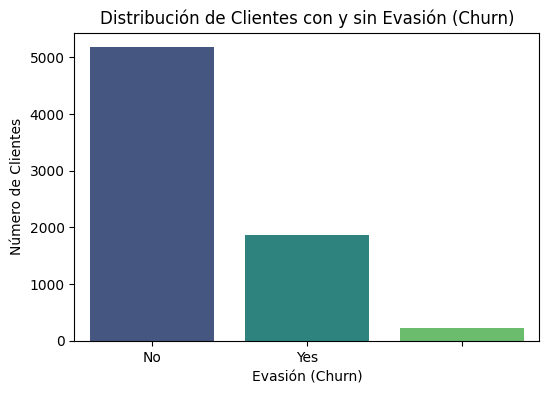


Conteo de Churn:
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Porcentaje de Churn:
Churn
No     71.20
Yes    25.72
        3.08
Name: proportion, dtype: float64%

--- Análisis de Relación entre Variables Clave y Churn ---


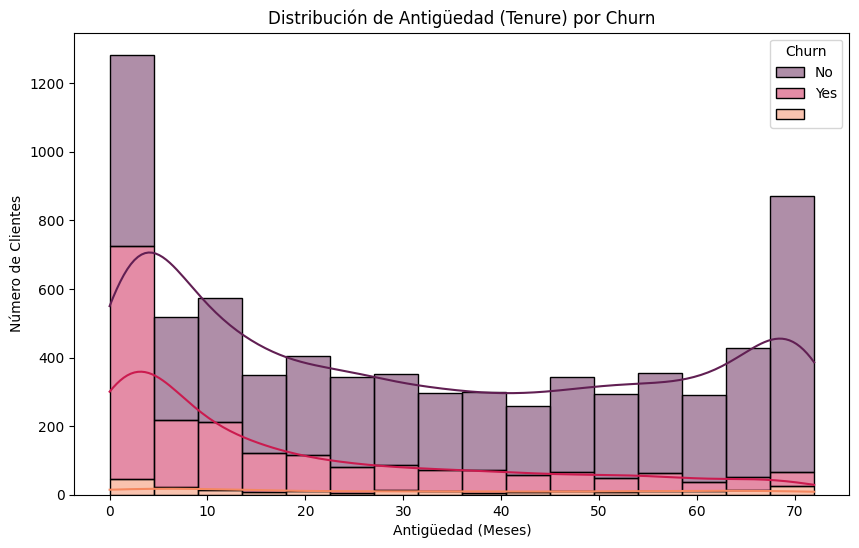

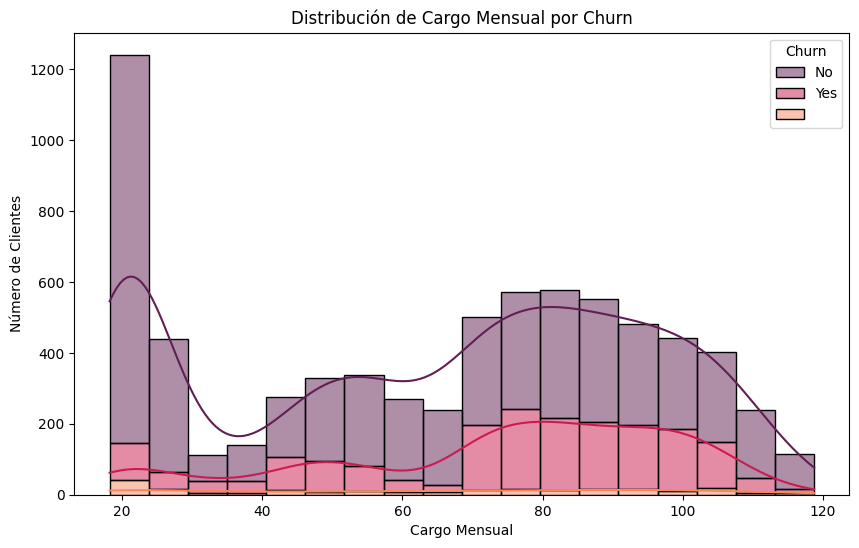

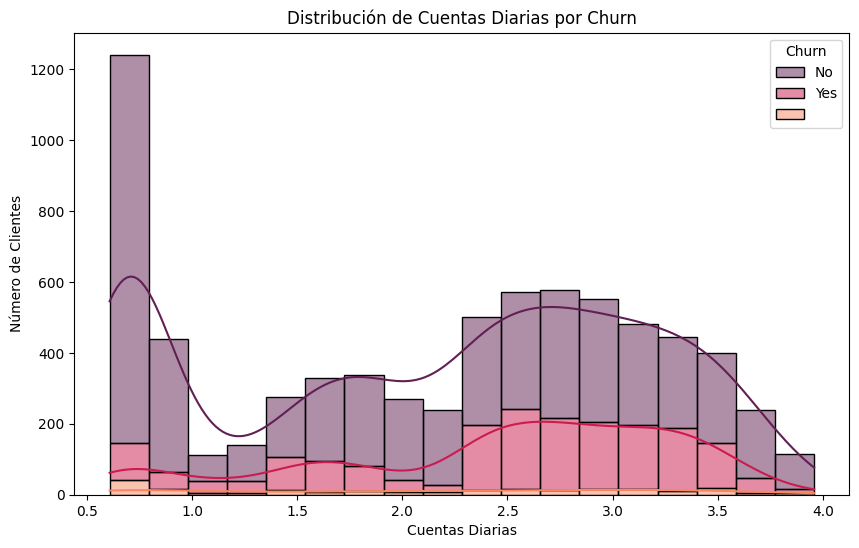

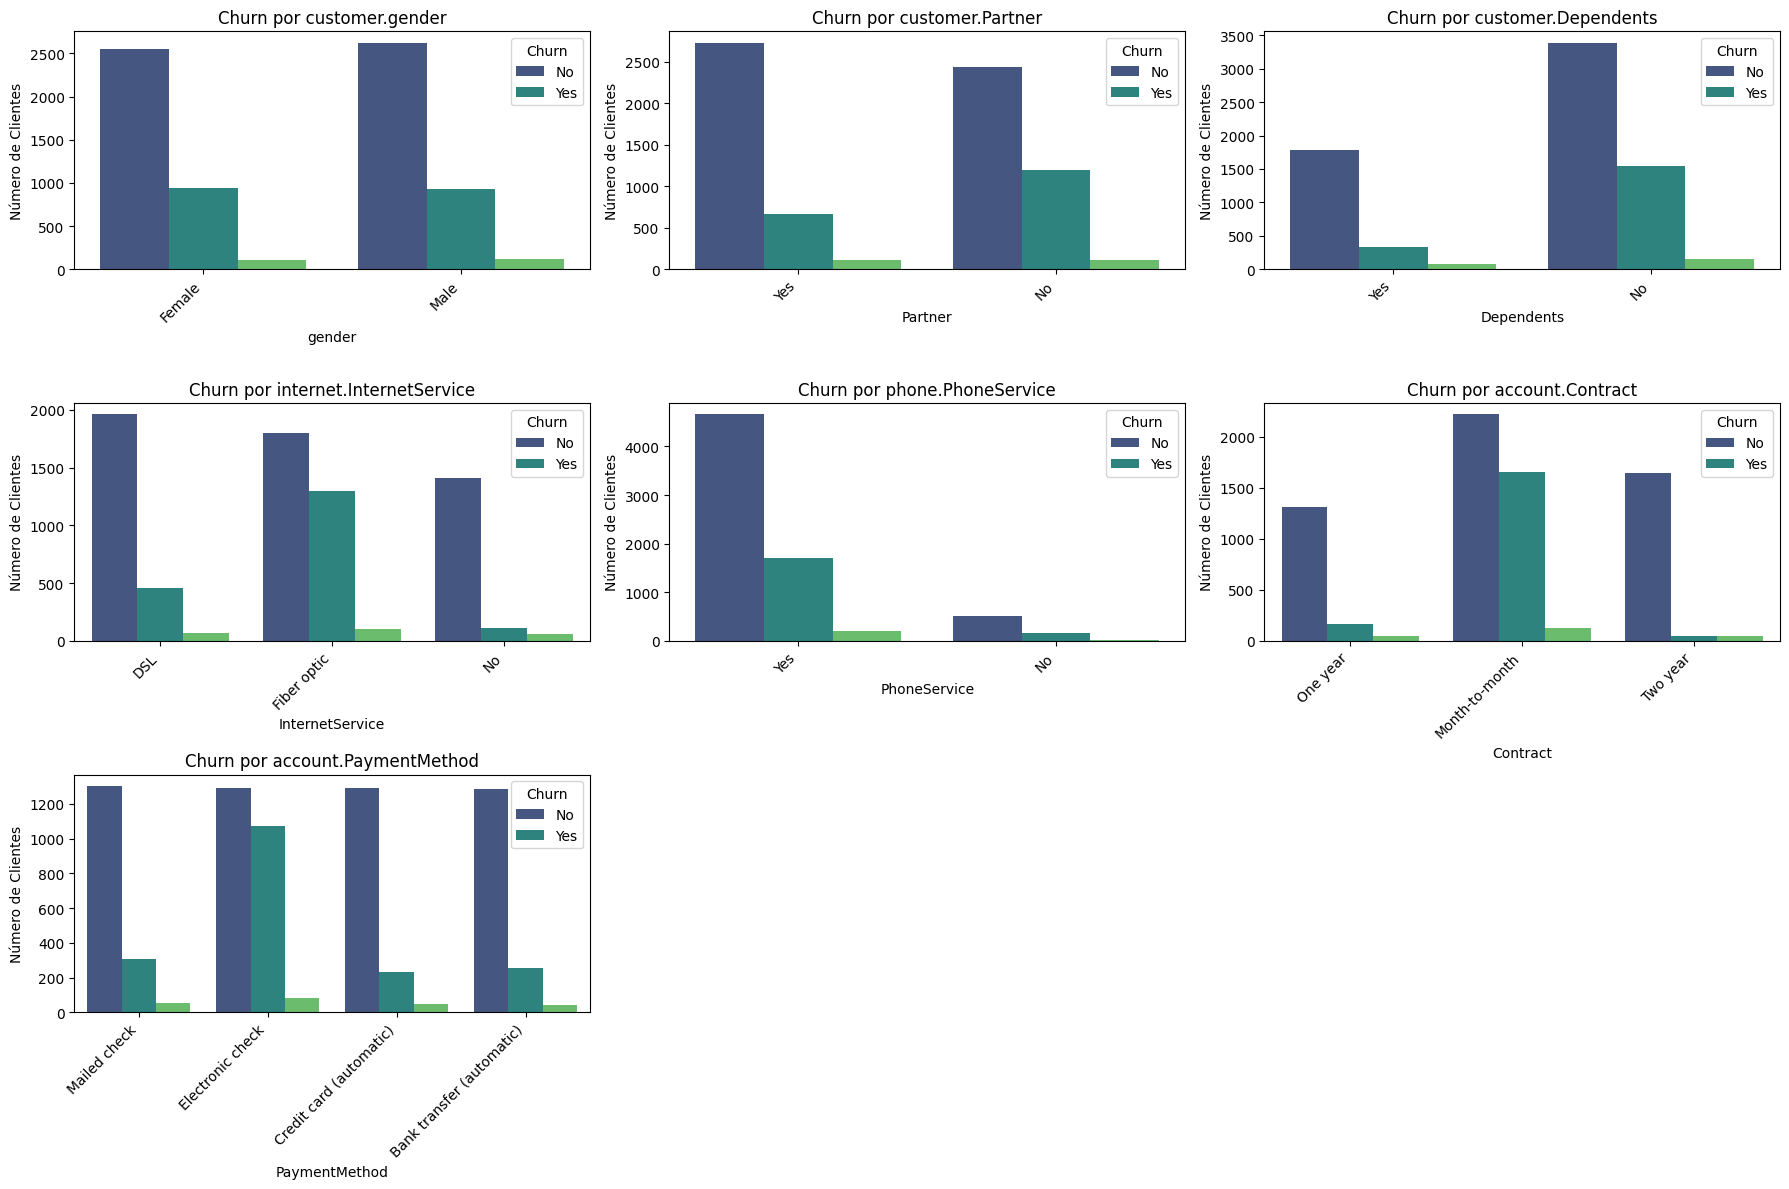


--- Análisis Completo Finalizado ---


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Carga y Normalización del Dataset ---
try:
    df = pd.read_json('TelecomX_Data.json')
    df_normalized = pd.json_normalize(df.to_dict(orient='records'))
    print("Dataset cargado y normalizado exitosamente.")
except FileNotFoundError:
    print("Error: El archivo 'TelecomX_Data.json' no se encontró. Asegúrate de que esté en el directorio correcto.")
    exit()

# --- 2. Limpieza de Datos (Reafirmación) ---
# Corrección de 'account.Charges.Total': Manejo de valores no numéricos y ausentes.
# Convertir a numérico, forzando errores a NaN, y luego rellenar NaNs con 0.
df_normalized['account.Charges.Total'] = pd.to_numeric(df_normalized['account.Charges.Total'], errors='coerce')
df_normalized['account.Charges.Total'] = df_normalized['account.Charges.Total'].fillna(0)
print("Corrección de 'account.Charges.Total' re-aplicada.")

# --- 3. Creación de la Columna 'Cuentas_Diarias' ---
df_normalized['Cuentas_Diarias'] = df_normalized['account.Charges.Monthly'] / 30
print("Columna 'Cuentas_Diarias' creada exitosamente.")
print(df_normalized[['account.Charges.Monthly', 'Cuentas_Diarias']].head())


# --- 4. Análisis de la Variable 'Churn' ---
print("\n--- Análisis de la Variable 'Churn' ---")

# Distribución de Churn
plt.figure(figsize=(6, 4))
sns.countplot(data=df_normalized, x='Churn', palette='viridis')
plt.title('Distribución de Clientes con y sin Evasión (Churn)')
plt.xlabel('Evasión (Churn)')
plt.ylabel('Número de Clientes')
plt.show()

# Porcentaje de Churn
churn_counts = df_normalized['Churn'].value_counts()
churn_percentage = df_normalized['Churn'].value_counts(normalize=True) * 100

print(f"\nConteo de Churn:\n{churn_counts}")
print(f"\nPorcentaje de Churn:\n{churn_percentage.round(2)}%")


# --- 5. Análisis de Variables Clave en relación con Churn ---

print("\n--- Análisis de Relación entre Variables Clave y Churn ---")

# Relación entre Antigüedad (tenure) y Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df_normalized, x='customer.tenure', hue='Churn', multiple='stack', palette='rocket', kde=True)
plt.title('Distribución de Antigüedad (Tenure) por Churn')
plt.xlabel('Antigüedad (Meses)')
plt.ylabel('Número de Clientes')
plt.show()

# Relación entre Cargo Mensual (account.Charges.Monthly) y Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df_normalized, x='account.Charges.Monthly', hue='Churn', multiple='stack', palette='rocket', kde=True)
plt.title('Distribución de Cargo Mensual por Churn')
plt.xlabel('Cargo Mensual')
plt.ylabel('Número de Clientes')
plt.show()

# Relación entre Cuentas Diarias y Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df_normalized, x='Cuentas_Diarias', hue='Churn', multiple='stack', palette='rocket', kde=True)
plt.title('Distribución de Cuentas Diarias por Churn')
plt.xlabel('Cuentas Diarias')
plt.ylabel('Número de Clientes')
plt.show()


# Análisis de Churn por variables categóricas
categorical_features_to_plot = [
    'customer.gender',
    'customer.Partner',
    'customer.Dependents',
    'internet.InternetService',
    'phone.PhoneService',
    'account.Contract',
    'account.PaymentMethod'
]

plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_features_to_plot):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df_normalized, x=col, hue='Churn', palette='viridis')
    plt.title(f'Churn por {col}')
    plt.xlabel(col.replace('customer.', '').replace('internet.', '').replace('account.', '').replace('phone.', ''))
    plt.ylabel('Número de Clientes')
    plt.xticks(rotation=45, ha='right') # Rotar etiquetas para mejor legibilidad

plt.tight_layout()
plt.show()

print("\n--- Análisis Completo Finalizado ---")

In [ ]:
pip install pandas numpy matplotlib seaborn

In [ ]:
# Asegurarse que Evasion_Cliente sea numérico (int) si no lo fue antes
if df_transformed['Evasion_Cliente'].dtype == 'object':
    # Reemplazar 'Yes' por 1, 'No' por 0, y los strings vacíos '' por 0 antes de convertir a int
    df_transformed['Evasion_Cliente'] = df_transformed['Evasion_Cliente'].replace({'Yes': 1, 'No': 0, '': 0}).astype(int)
    print("\n'Evasion_Cliente' (variable objetivo) convertida a tipo numérico (0 y 1), manejando valores vacíos.")


'Evasion_Cliente' (variable objetivo) convertida a tipo numérico (0 y 1), manejando valores vacíos.


<ipython-input-30-c6a8c4717f23>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_transformed['Evasion_Cliente'] = df_transformed['Evasion_Cliente'].replace({'Yes': 1, 'No': 0, '': 0}).astype(int)


#📊 Carga y análisis

In [ ]:
print("\n--- 6. Análisis Descriptivo de los Datos ---")
print("Métricas descriptivas para columnas numéricas:")
print(df_transformed.describe())

# Para obtener una descripción de las columnas categóricas (si quedan después de OHE y Renombrado, excepto ID_Cliente)
print("\n--- Descripción de columnas categóricas (no numéricas, excluyendo ID_Cliente) ---")
non_numeric_cols = df_transformed.select_dtypes(include='object').columns.drop('ID_Cliente', errors='ignore')
if not non_numeric_cols.empty:
    for col in non_numeric_cols:
        print(f"\nColumna: '{col}'")
        print(df_transformed[col].value_counts(normalize=True) * 100)
else:
    print("No quedan columnas categóricas (tipo 'object') aparte de 'ID_Cliente' después de la transformación.")

# Remove the two lines that cause the NameError
# Fuentes
# Fuentes


--- 6. Análisis Descriptivo de los Datos ---
Métricas descriptivas para columnas numéricas:
       Evasion_Cliente  Genero_Cliente  Adulto_Mayor  Tiene_Pareja  \
count      7267.000000     7267.000000   7267.000000   7267.000000   
mean          0.257190        0.505711      0.162653      0.484106   
std           0.437115        0.500002      0.369074      0.499782   
min           0.000000        0.000000      0.000000      0.000000   
25%           0.000000        0.000000      0.000000      0.000000   
50%           0.000000        1.000000      0.000000      0.000000   
75%           1.000000        1.000000      0.000000      1.000000   
max           1.000000        1.000000      1.000000      1.000000   

       Tiene_Dependientes  Antiguedad_Meses  Servicio_Telefonico  \
count         7267.000000       7267.000000          7267.000000   
mean             0.300124         32.346498             0.902711   
std              0.458343         24.571773             0.296371   
min 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Carga y Normalización del Dataset ---
# Este bloque carga el archivo JSON y lo convierte en un DataFrame plano.
try:
    df = pd.read_json('TelecomX_Data.json')
    df_normalized = pd.json_normalize(df.to_dict(orient='records'))
    print("Dataset cargado y normalizado exitosamente.")
except FileNotFoundError:
    print("Error: El archivo 'TelecomX_Data.json' no se encontró. Asegúrate de que esté en el directorio correcto.")
    exit()

# --- 2. Limpieza de Datos ---
# Se corrige la columna 'account.Charges.Total' que puede contener valores no numéricos.
# Se convierten a numérico y se rellenan los valores ausentes (NaN) con 0.
print("\n--- 2. Limpieza de Datos ---")
df_normalized['account.Charges.Total'] = pd.to_numeric(df_normalized['account.Charges.Total'], errors='coerce')
df_normalized['account.Charges.Total'] = df_normalized['account.Charges.Total'].fillna(0)
print("Corrección de 'account.Charges.Total' aplicada (convertida a numérico y NaNs a 0).")

# --- 3. Creación de la Columna 'Cuentas_Diarias' ---
# Se calcula el cargo diario dividiendo el cargo mensual por 30 días.
print("\n--- 3. Creación de la Columna 'Cuentas_Diarias' ---")
df_normalized['Cuentas_Diarias'] = df_normalized['account.Charges.Monthly'] / 30
print("Columna 'Cuentas_Diarias' creada exitosamente.")


# --- 4. Análisis Exploratorio Inicial (Conteo de Churn) ---
# Se muestra el conteo y porcentaje inicial de la variable Churn.
print("\n--- 4. Análisis Exploratorio Inicial (Conteo de Churn) ---")
churn_counts_initial = df_normalized['Churn'].value_counts()
churn_percentage_initial = df_normalized['Churn'].value_counts(normalize=True) * 100
print(f"\nConteo de Churn (Inicial):\n{churn_counts_initial}")
print(f"\nPorcentaje de Churn (Inicial):\n{churn_percentage_initial.round(2)}%")


# --- 5. Estandarización y Transformación de Datos ---
# Este es el bloque clave para la transformación de datos para su uso en modelos.
print("\n--- 5. Estandarización y Transformación de Datos ---")

# a) Mapeo Binario (Sí/No a 1/0) y Género
# Columnas a mapear 'Yes' a 1 y 'No' a 0
binary_map_yes_no_cols = [
    'Churn', # La variable objetivo
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'account.PaperlessBilling',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies'
]

for col in binary_map_yes_no_cols:
    if col in df_normalized.columns:
        df_normalized[col] = df_normalized[col].replace({'Yes': 1, 'No': 0})
print("Mapeo binario de 'Yes'/'No' a 1/0 aplicado a columnas relevantes.")

# Mapear 'customer.gender': 'Female'=0, 'Male'=1
if 'customer.gender' in df_normalized.columns:
    df_normalized['customer.gender'] = df_normalized['customer.gender'].replace({'Female': 0, 'Male': 1})
    print("Mapeo de 'customer.gender' a 0 (Female) y 1 (Male) aplicado.")


# b) Renombrar Columnas para mayor claridad y en español
column_rename_map = {
    'customerID': 'ID_Cliente',
    'Churn': 'Evasion_Cliente', # Ahora será 0 o 1
    'customer.gender': 'Genero_Cliente',
    'customer.SeniorCitizen': 'Adulto_Mayor',
    'customer.Partner': 'Tiene_Pareja',
    'customer.Dependents': 'Tiene_Dependientes',
    'customer.tenure': 'Antiguedad_Meses',
    'phone.PhoneService': 'Servicio_Telefonico',
    'phone.MultipleLines': 'Multiples_Lineas',
    'internet.InternetService': 'Tipo_Servicio_Internet',
    'internet.OnlineSecurity': 'Seguridad_Online',
    'internet.OnlineBackup': 'Respaldo_Online',
    'internet.DeviceProtection': 'Proteccion_Dispositivo',
    'internet.TechSupport': 'Soporte_Tecnico',
    'internet.StreamingTV': 'Streaming_TV',
    'internet.StreamingMovies': 'Streaming_Peliculas',
    'account.Contract': 'Tipo_Contrato',
    'account.PaperlessBilling': 'Facturacion_Sin_Papel',
    'account.PaymentMethod': 'Metodo_Pago',
    'account.Charges.Monthly': 'Cargo_Mensual',
    'account.Charges.Total': 'Cargo_Total',
    'Cuentas_Diarias': 'Cargo_Diario'
}

df_normalized.rename(columns=column_rename_map, inplace=True)
print("\nColumnas renombradas para mayor claridad y en español.")


# c) One-Hot Encoding para columnas categóricas con más de dos categorías
categorical_cols_for_ohe = []
# Verificar las columnas que aún son de tipo 'object' después del mapeo binario
for col in df_normalized.columns:
    if df_normalized[col].dtype == 'object' and col not in ['ID_Cliente', 'Evasion_Cliente']:
        categorical_cols_for_ohe.append(col)

if categorical_cols_for_ohe:
    df_transformed = pd.get_dummies(df_normalized, columns=categorical_cols_for_ohe, drop_first=True, dtype=int)
    print("\nOne-Hot Encoding aplicado a columnas relevantes.")
else:
    df_transformed = df_normalized.copy()
    print("\nNo se encontraron columnas adicionales para One-Hot Encoding.")

# Asegurarse que Evasion_Cliente sea numérico (int) y manejar posibles valores no numéricos
df_transformed['Evasion_Cliente'] = pd.to_numeric(df_transformed['Evasion_Cliente'], errors='coerce')
# Rellenar NaNs resultantes de 'coerce' con 0 (asumiendo 'No Evasión' para datos inválidos/faltantes)
df_transformed['Evasion_Cliente'] = df_transformed['Evasion_Cliente'].fillna(0).astype(int)

print("\n'Evasion_Cliente' (variable objetivo) convertida a tipo numérico (0 y 1).")
print("\n¡Estandarización y transformación de datos completada!")


# --- 6. Análisis Descriptivo de los Datos ---
print("\n--- 6. Análisis Descriptivo de los Datos ---")
print("Métricas descriptivas para columnas numéricas:")
print(df_transformed.describe())

# Para obtener una descripción de las columnas categóricas (si quedan después de OHE y Renombrado, excepto ID_Cliente)
print("\n--- Descripción de columnas categóricas (no numéricas, excluyendo ID_Cliente) ---")
non_numeric_cols = df_transformed.select_dtypes(include='object').columns.drop('ID_Cliente', errors='ignore')
if not non_numeric_cols.empty:
    for col in non_numeric_cols:
        print(f"\nColumna: '{col}'")
        print(df_transformed[col].value_counts(normalize=True) * 100)
else:
    print("No quedan columnas categóricas (tipo 'object') aparte de 'ID_Cliente' después de la transformación.")


# --- 7. Visualización de la Distribución de 'Evasion_Cliente' ---
print("\n--- 7. Visualización de la Distribución de 'Evasion_Cliente' ---")

# Gráfico de barras (countplot) para la cantidad
plt.figure(figsize=(8, 6))
sns.countplot(data=df_transformed, x='Evasion_Cliente', palette='viridis')
plt.title('Distribución de Clientes con y sin Evasión (Churn)')
plt.xlabel('Evasión del Cliente (0: No Evasión, 1: Evasión)')
plt.ylabel('Número de Clientes')
plt.xticks(ticks=[0, 1], labels=['No Evasión', 'Evasión'])
plt.show()

# Gráfico de pastel (pie chart) para las proporciones
churn_proportions = df_transformed['Evasion_Cliente'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
plt.pie(churn_proportions, labels=['No Evasión ({:.2f}%)'.format(churn_proportions[0]),
                                  'Evasión ({:.2f}%)'.format(churn_proportions[1])],
        autopct='%1.1f%%', colors=['lightgreen', 'salmon'], startangle=90)
plt.title('Proporción de Clientes con y sin Evasión (Churn)')
plt.axis('equal') # Asegura que el círculo sea proporcional
plt.show()

print("\nVisualización de la distribución de 'Evasion_Cliente' completada.")


--- 8. Exploración de Evasión según Variables Categóricas ---


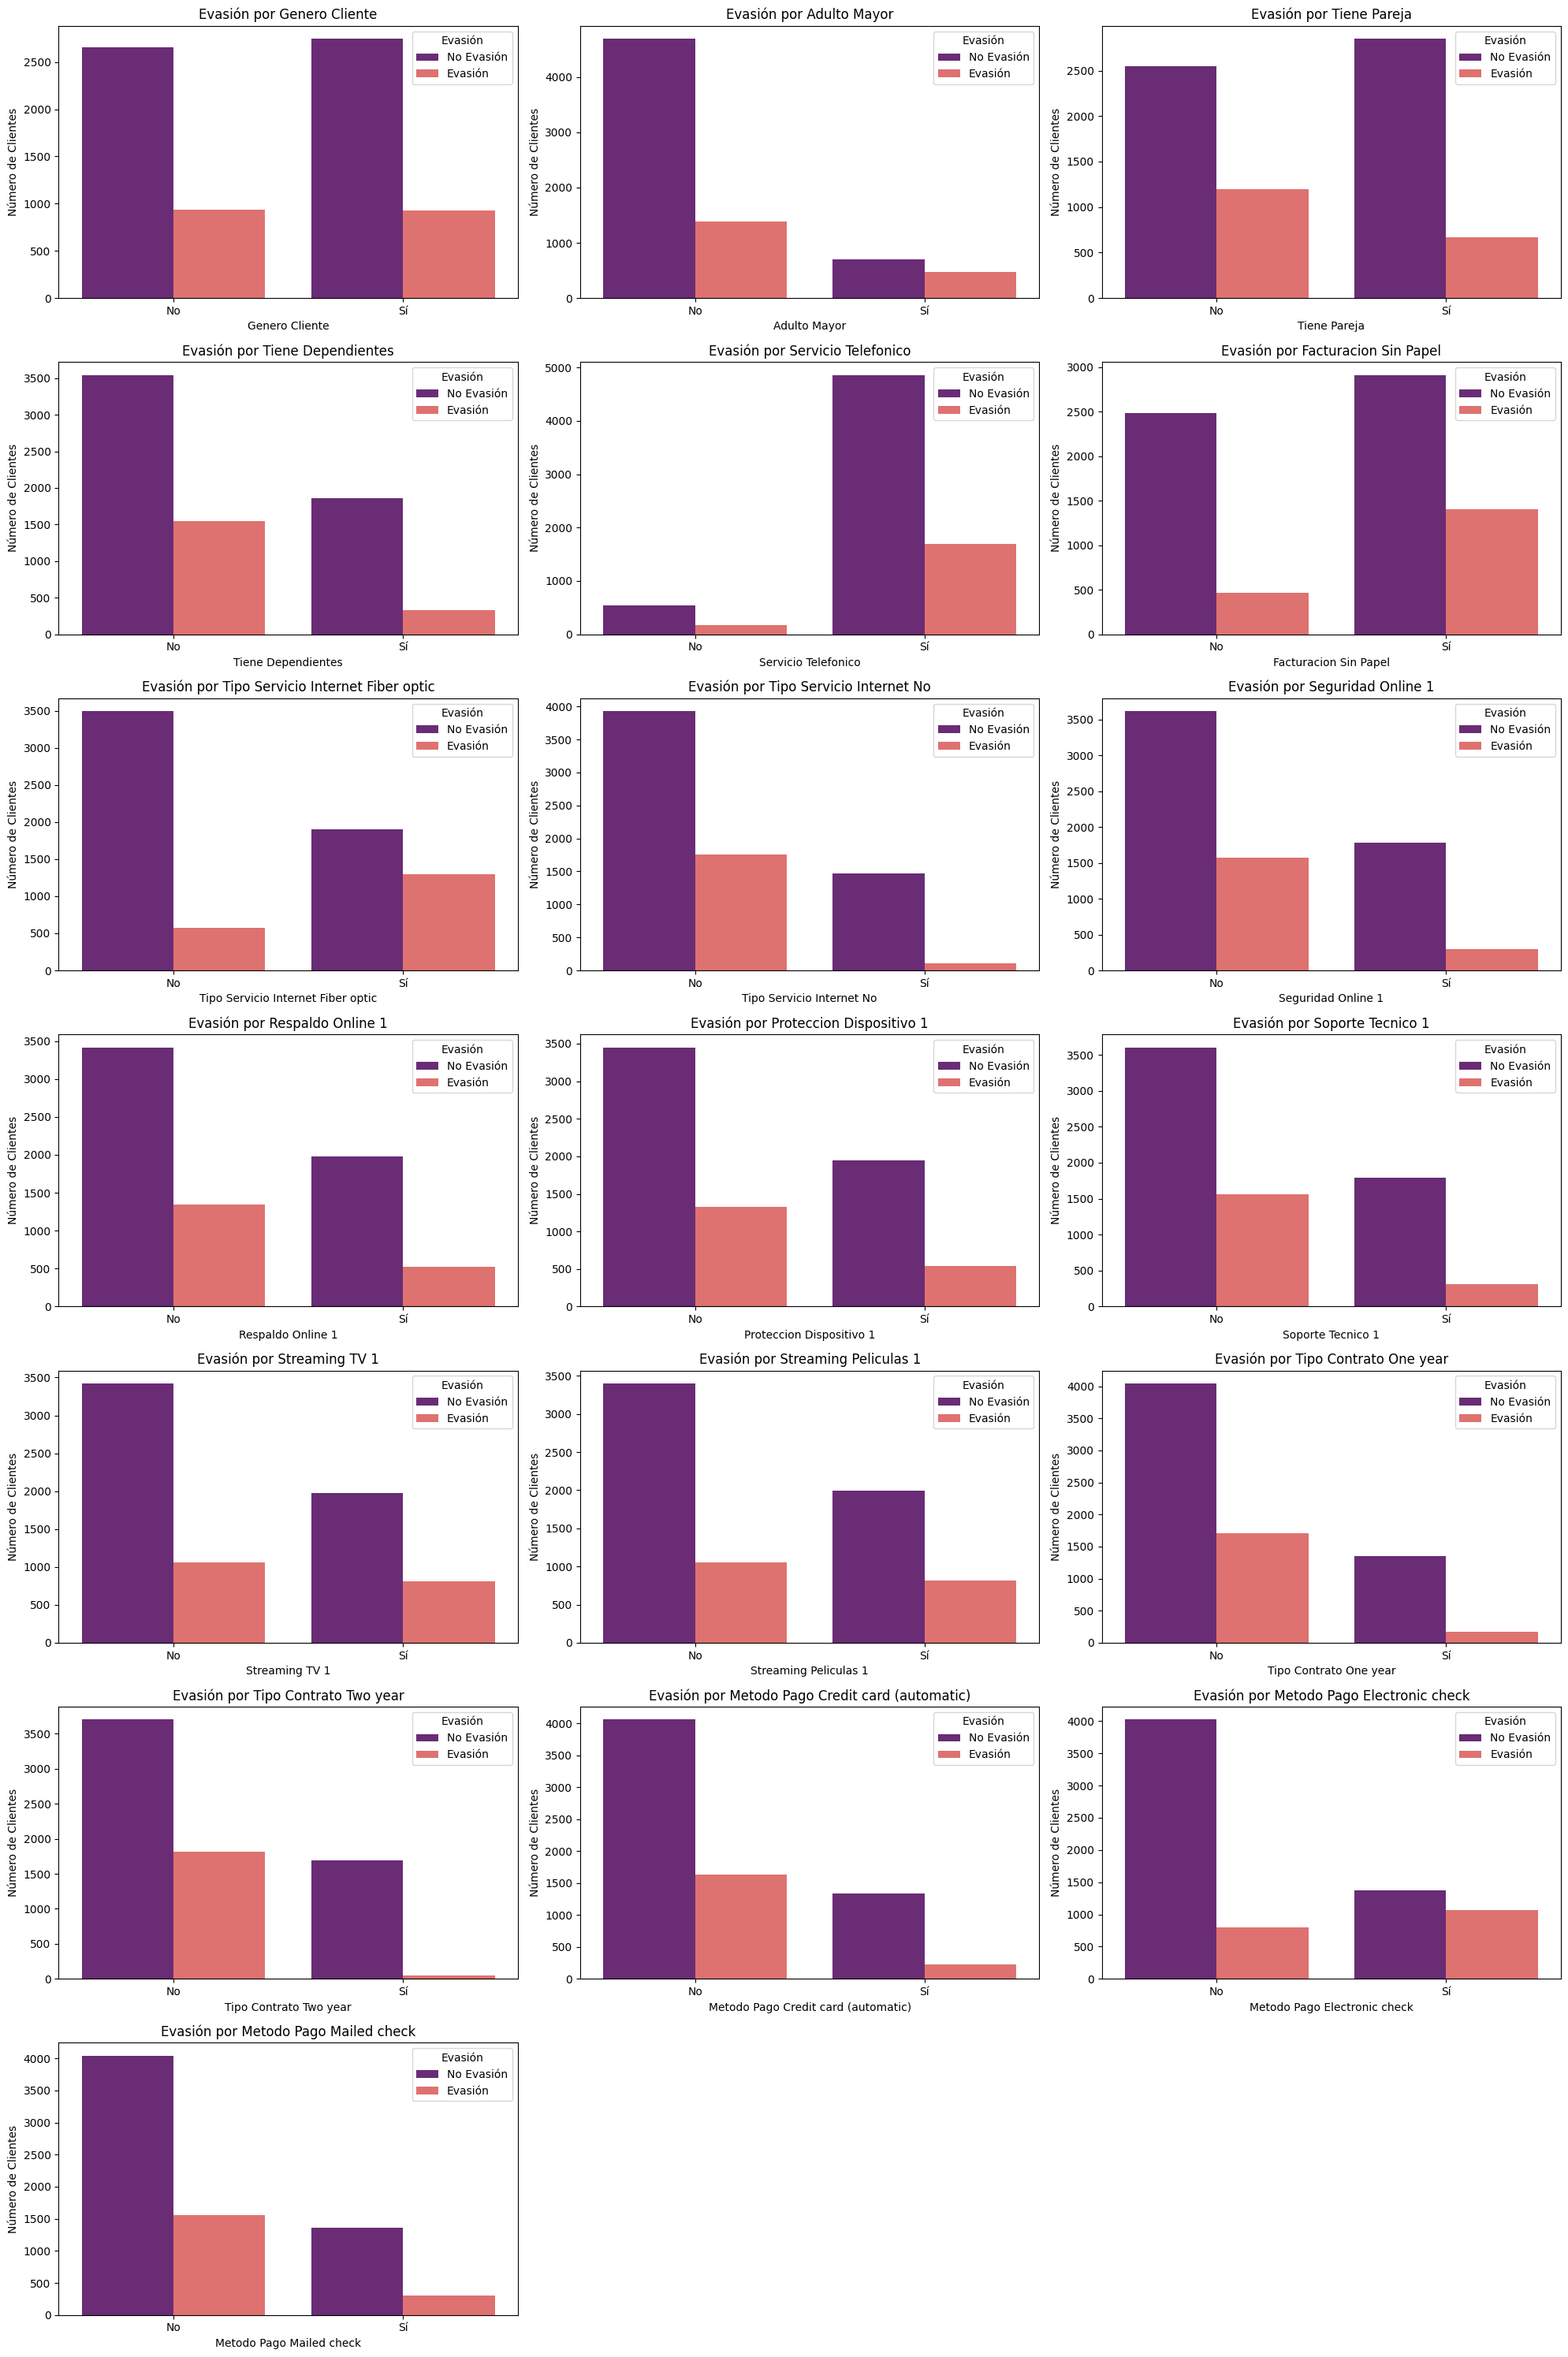


Análisis de evasión según variables categóricas completado.


In [ ]:
# --- 8. Exploración de Evasión según Variables Categóricas ---
print("\n--- 8. Exploración de Evasión según Variables Categóricas ---")

# Lista de columnas categóricas para visualizar la evasión (tomando en cuenta las que fueron renombradas y OHE)
categorical_features_for_churn_analysis = [
    'Genero_Cliente',
    'Adulto_Mayor',
    'Tiene_Pareja',
    'Tiene_Dependientes',
    'Servicio_Telefonico',
    'Facturacion_Sin_Papel',
    'Tipo_Servicio_Internet_Fiber optic', # Representa un tipo de servicio de internet
    'Tipo_Servicio_Internet_No',          # Representa la ausencia de servicio de internet
    'Seguridad_Online_1',                 # Si tienen seguridad online
    'Respaldo_Online_1',                  # Si tienen respaldo online
    'Proteccion_Dispositivo_1',           # Si tienen protección de dispositivo
    'Soporte_Tecnico_1',                  # Si tienen soporte técnico
    'Streaming_TV_1',                     # Si tienen streaming TV
    'Streaming_Peliculas_1',              # Si tienen streaming películas
    'Tipo_Contrato_One year',             # Contrato de un año
    'Tipo_Contrato_Two year',             # Contrato de dos años
    'Metodo_Pago_Credit card (automatic)',
    'Metodo_Pago_Electronic check',
    'Metodo_Pago_Mailed check'
]

# Configurar el tamaño de la figura para múltiples gráficos
plt.figure(figsize=(20, 30))
# Calcular el número de filas y columnas para la subgráfica
n_cols = 3
n_rows = int(np.ceil(len(categorical_features_for_churn_analysis) / n_cols))

for i, col in enumerate(categorical_features_for_churn_analysis):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df_transformed, x=col, hue='Evasion_Cliente', palette='magma')
    plt.title(f'Evasión por {col.replace("_", " ")}', fontsize=12)
    plt.xlabel(col.replace("_", " "), fontsize=10)
    plt.ylabel('Número de Clientes', fontsize=10)

    # Mejorar las etiquetas para columnas binarias (0/1) para mayor claridad
    if col in ['Genero_Cliente', 'Adulto_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes', 'Servicio_Telefonico', 'Facturacion_Sin_Papel',
                'Seguridad_Online_1', 'Respaldo_Online_1', 'Proteccion_Dispositivo_1', 'Soporte_Tecnico_1',
                'Streaming_TV_1', 'Streaming_Peliculas_1', 'Tipo_Servicio_Internet_Fiber optic', 'Tipo_Servicio_Internet_No',
                'Tipo_Contrato_One year', 'Tipo_Contrato_Two year',
                'Metodo_Pago_Credit card (automatic)', 'Metodo_Pago_Electronic check', 'Metodo_Pago_Mailed check']:
        plt.xticks(ticks=[0, 1], labels=['No', 'Sí'], rotation=0)

    # Ajustar leyendas para Churn
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles=handles, labels=['No Evasión', 'Evasión'], title='Evasión')

plt.tight_layout()
plt.show()

print("\nAnálisis de evasión según variables categóricas completado.")


--- 9. Exploración de Evasión según Variables Numéricas ---


<ipython-input-38-553cc1ebdbfb>:23: UserWarning: Mismatched number of handles and labels: len(handles) = 0 len(labels) = 2
  plt.legend(handles=handles, labels=['No Evasión', 'Evasión'], title='Evasión')
<ipython-input-38-553cc1ebdbfb>:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(handles=handles, labels=['No Evasión', 'Evasión'], title='Evasión')
<ipython-input-38-553cc1ebdbfb>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_transformed, x='Evasion_Cliente', y=col, palette='viridis')
<ipython-input-38-553cc1ebdbfb>:23: UserWarning: Mismatched number of handles and labels: len(handles) = 0 len(labels) = 2
  plt.legend(handles=handles, labels=['No Evasión', 'Evasión'], title='Evasión')
<ipy

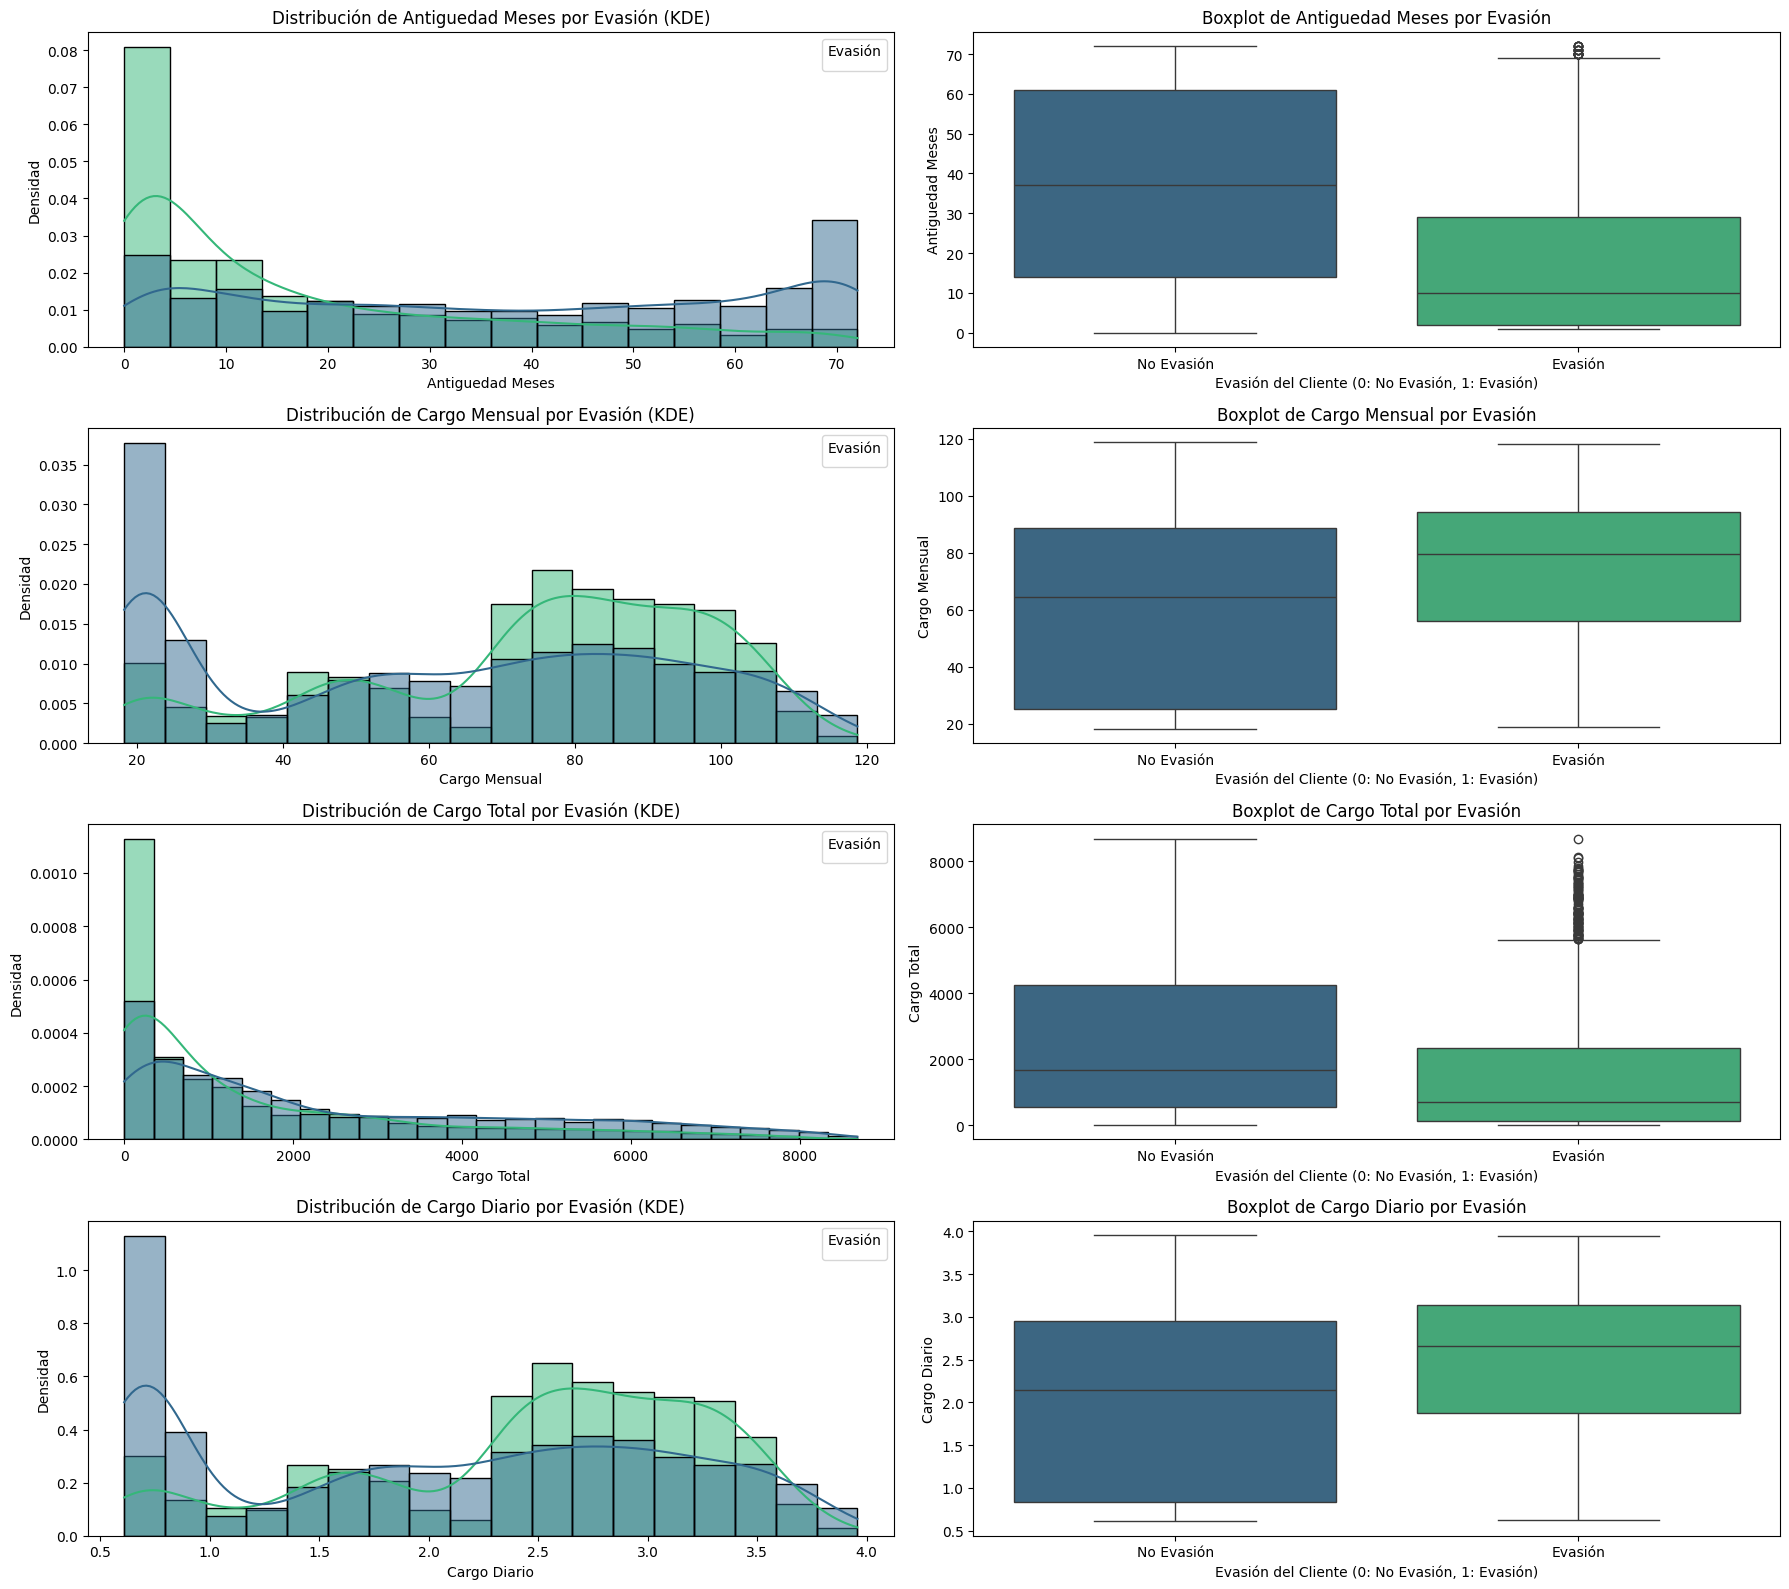


Análisis de evasión según variables numéricas completado.


In [ ]:
# --- 9. Exploración de Evasión según Variables Numéricas ---
print("\n--- 9. Exploración de Evasión según Variables Numéricas ---")

# Lista de columnas numéricas para visualizar la evasión
numerical_features_for_churn_analysis = [
    'Antiguedad_Meses',
    'Cargo_Mensual',
    'Cargo_Total',
    'Cargo_Diario'
]

# Configurar el tamaño de la figura para múltiples gráficos (histograms y boxplots)
plt.figure(figsize=(18, 16)) # Ajustar el tamaño para acomodar 2 tipos de gráficos por variable

for i, col in enumerate(numerical_features_for_churn_analysis):
    # Histograma/KDE
    plt.subplot(len(numerical_features_for_churn_analysis), 2, 2*i + 1)
    sns.histplot(data=df_transformed, x=col, hue='Evasion_Cliente', kde=True, palette='viridis', common_norm=False, stat='density')
    plt.title(f'Distribución de {col.replace("_", " ")} por Evasión (KDE)', fontsize=12)
    plt.xlabel(col.replace("_", " "), fontsize=10)
    plt.ylabel('Densidad', fontsize=10)
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles=handles, labels=['No Evasión', 'Evasión'], title='Evasión')

    # Boxplot
    plt.subplot(len(numerical_features_for_churn_analysis), 2, 2*i + 2)
    sns.boxplot(data=df_transformed, x='Evasion_Cliente', y=col, palette='viridis')
    plt.title(f'Boxplot de {col.replace("_", " ")} por Evasión', fontsize=12)
    plt.xlabel('Evasión del Cliente (0: No Evasión, 1: Evasión)', fontsize=10)
    plt.ylabel(col.replace("_", " "), fontsize=10)
    plt.xticks(ticks=[0, 1], labels=['No Evasión', 'Evasión'])

plt.tight_layout()
plt.show()

print("\nAnálisis de evasión según variables numéricas completado.")

#📄Informe final

Dataset cargado y normalizado exitosamente.

--- 2. Limpieza de Datos ---
Corrección de 'account.Charges.Total' aplicada (convertida a numérico y NaNs a 0).

--- 3. Creación de la Columna 'Cuentas_Diarias' ---
Columna 'Cuentas_Diarias' creada exitosamente.

--- 4. Análisis Exploratorio Inicial (Conteo de Churn) ---

Conteo de Churn (Inicial):
Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64

Porcentaje de Churn (Inicial):
Churn
No     71.20
Yes    25.72
        3.08
Name: proportion, dtype: float64%

--- 5. Estandarización y Transformación de Datos ---
Mapeo binario de 'Yes'/'No' a 1/0 aplicado a columnas relevantes.
Mapeo de 'customer.gender' a 0 (Female) y 1 (Male) aplicado.

Columnas renombradas para mayor claridad y en español.

One-Hot Encoding aplicado a columnas relevantes.

'Evasion_Cliente' (variable objetivo) convertida a tipo numérico (0 y 1).

¡Estandarización y transformación de datos completada!

# 📊 Informe de Análisis de Evasión de Clientes (Churn) en

<ipython-input-40-709845da7936>:54: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalized[col] = df_normalized[col].replace({'Yes': 1, 'No': 0})
<ipython-input-40-709845da7936>:58: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalized['customer.gender'] = df_normalized['customer.gender'].replace({'Female': 0, 'Male': 1})
<ipython-input-40-709845da7936>:162: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for

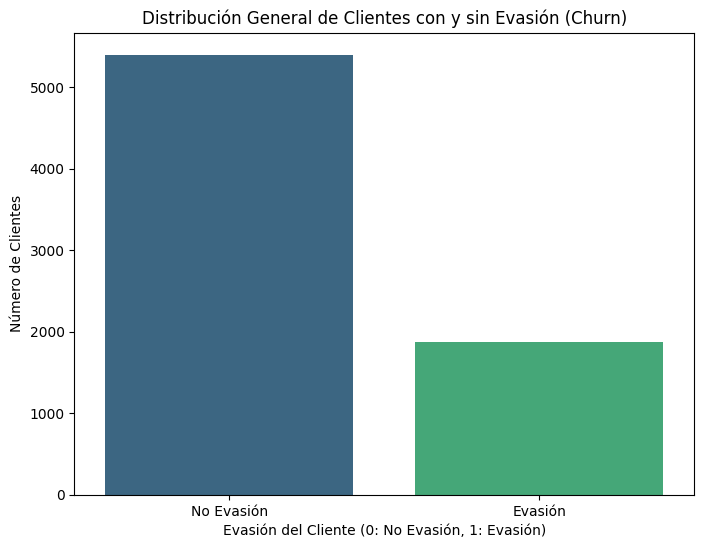

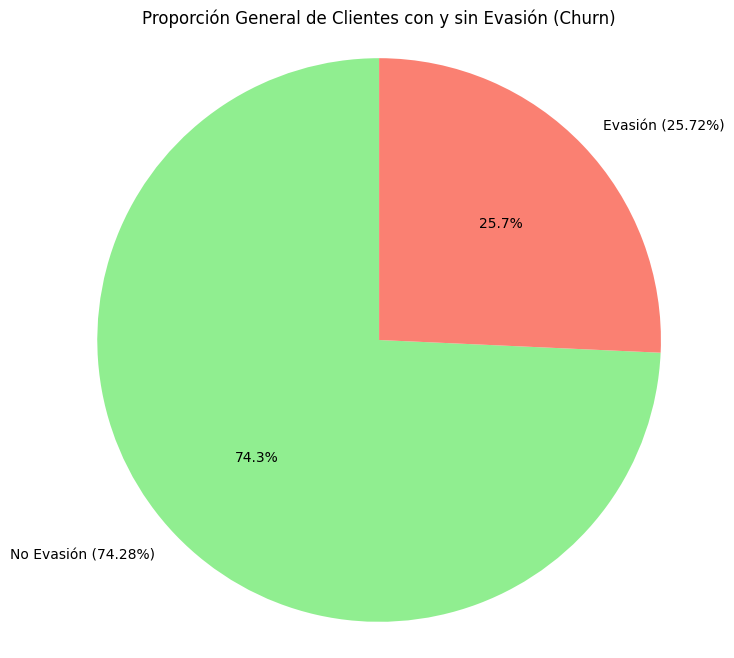


**Observaciones:**
* Aproximadamente el `25.72%` de los clientes en este dataset han evadido, lo que indica un problema significativo que requiere atención.


### Evasión por Variables Categóricas

Se exploró la relación entre la evasión y diversas características categóricas de los clientes, como el género, si tienen pareja o dependientes, el tipo de contrato, y el método de pago.


--- 8. Exploración de Evasión según Variables Categóricas ---


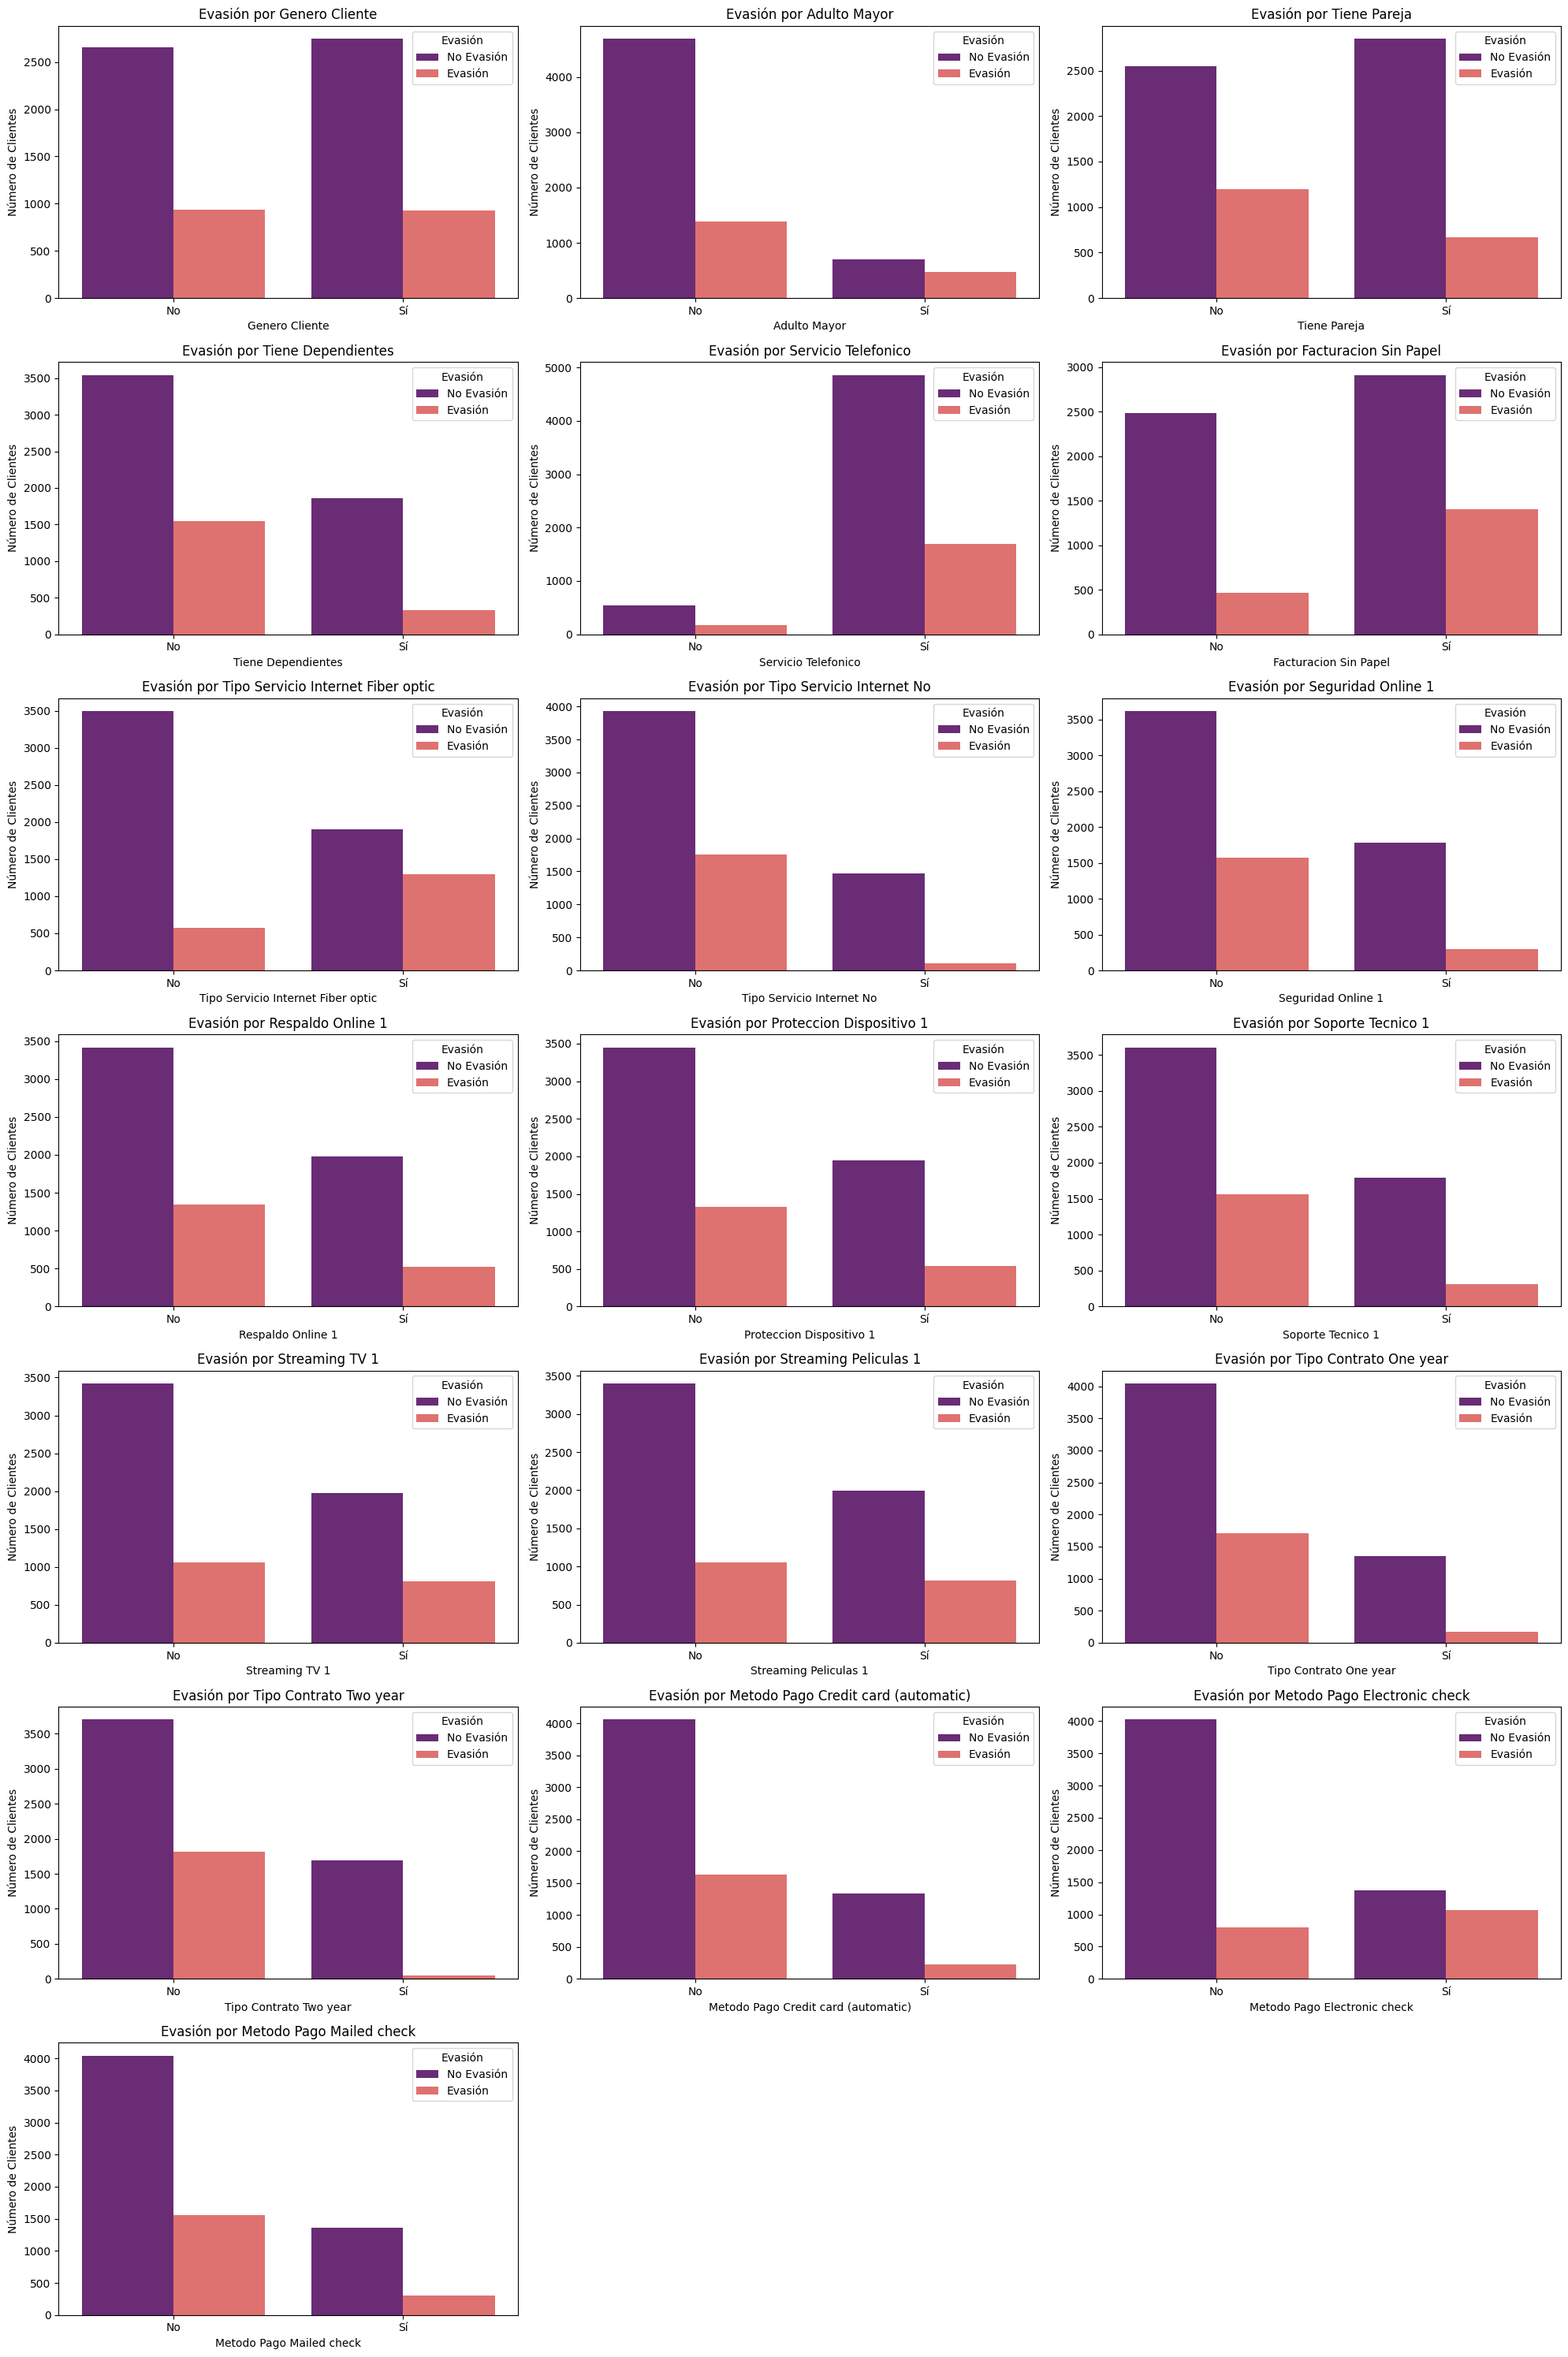


**Insights Clave de Variables Categóricas:**
* **Contrato Mes a Mes:** Los clientes con contratos mes a mes tienen una tasa de evasión desproporcionadamente alta en comparación con los contratos de uno o dos años.
* **Facturación Sin Papel:** La preferencia por la facturación sin papel está fuertemente asociada con una mayor evasión.
* **Método de Pago - Cheque Electrónico:** Los clientes que pagan con cheque electrónico muestran una tasa de evasión considerablemente más alta que otros métodos.
* **Servicio de Internet - Fibra Óptica:** A pesar de ser un servicio "premium", los clientes con fibra óptica tienen una mayor probabilidad de evadir. Los clientes sin servicio de internet tienen una tasa de evasión muy baja.
* **Servicios Adicionales de Internet:** La ausencia de servicios como seguridad online, respaldo online, protección de dispositivo y soporte técnico parece correlacionarse con una mayor evasión entre los clientes con servicio de internet.
* **Dependientes y Pareja:** Los

<ipython-input-40-709845da7936>:274: UserWarning: Mismatched number of handles and labels: len(handles) = 0 len(labels) = 2
  plt.legend(handles=handles, labels=['No Evasión', 'Evasión'], title='Evasión')
<ipython-input-40-709845da7936>:274: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(handles=handles, labels=['No Evasión', 'Evasión'], title='Evasión')
<ipython-input-40-709845da7936>:277: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_transformed, x='Evasion_Cliente', y=col, palette='viridis')
<ipython-input-40-709845da7936>:274: UserWarning: Mismatched number of handles and labels: len(handles) = 0 len(labels) = 2
  plt.legend(handles=handles, labels=['No Evasión', 'Evasión'], title='Evasión')


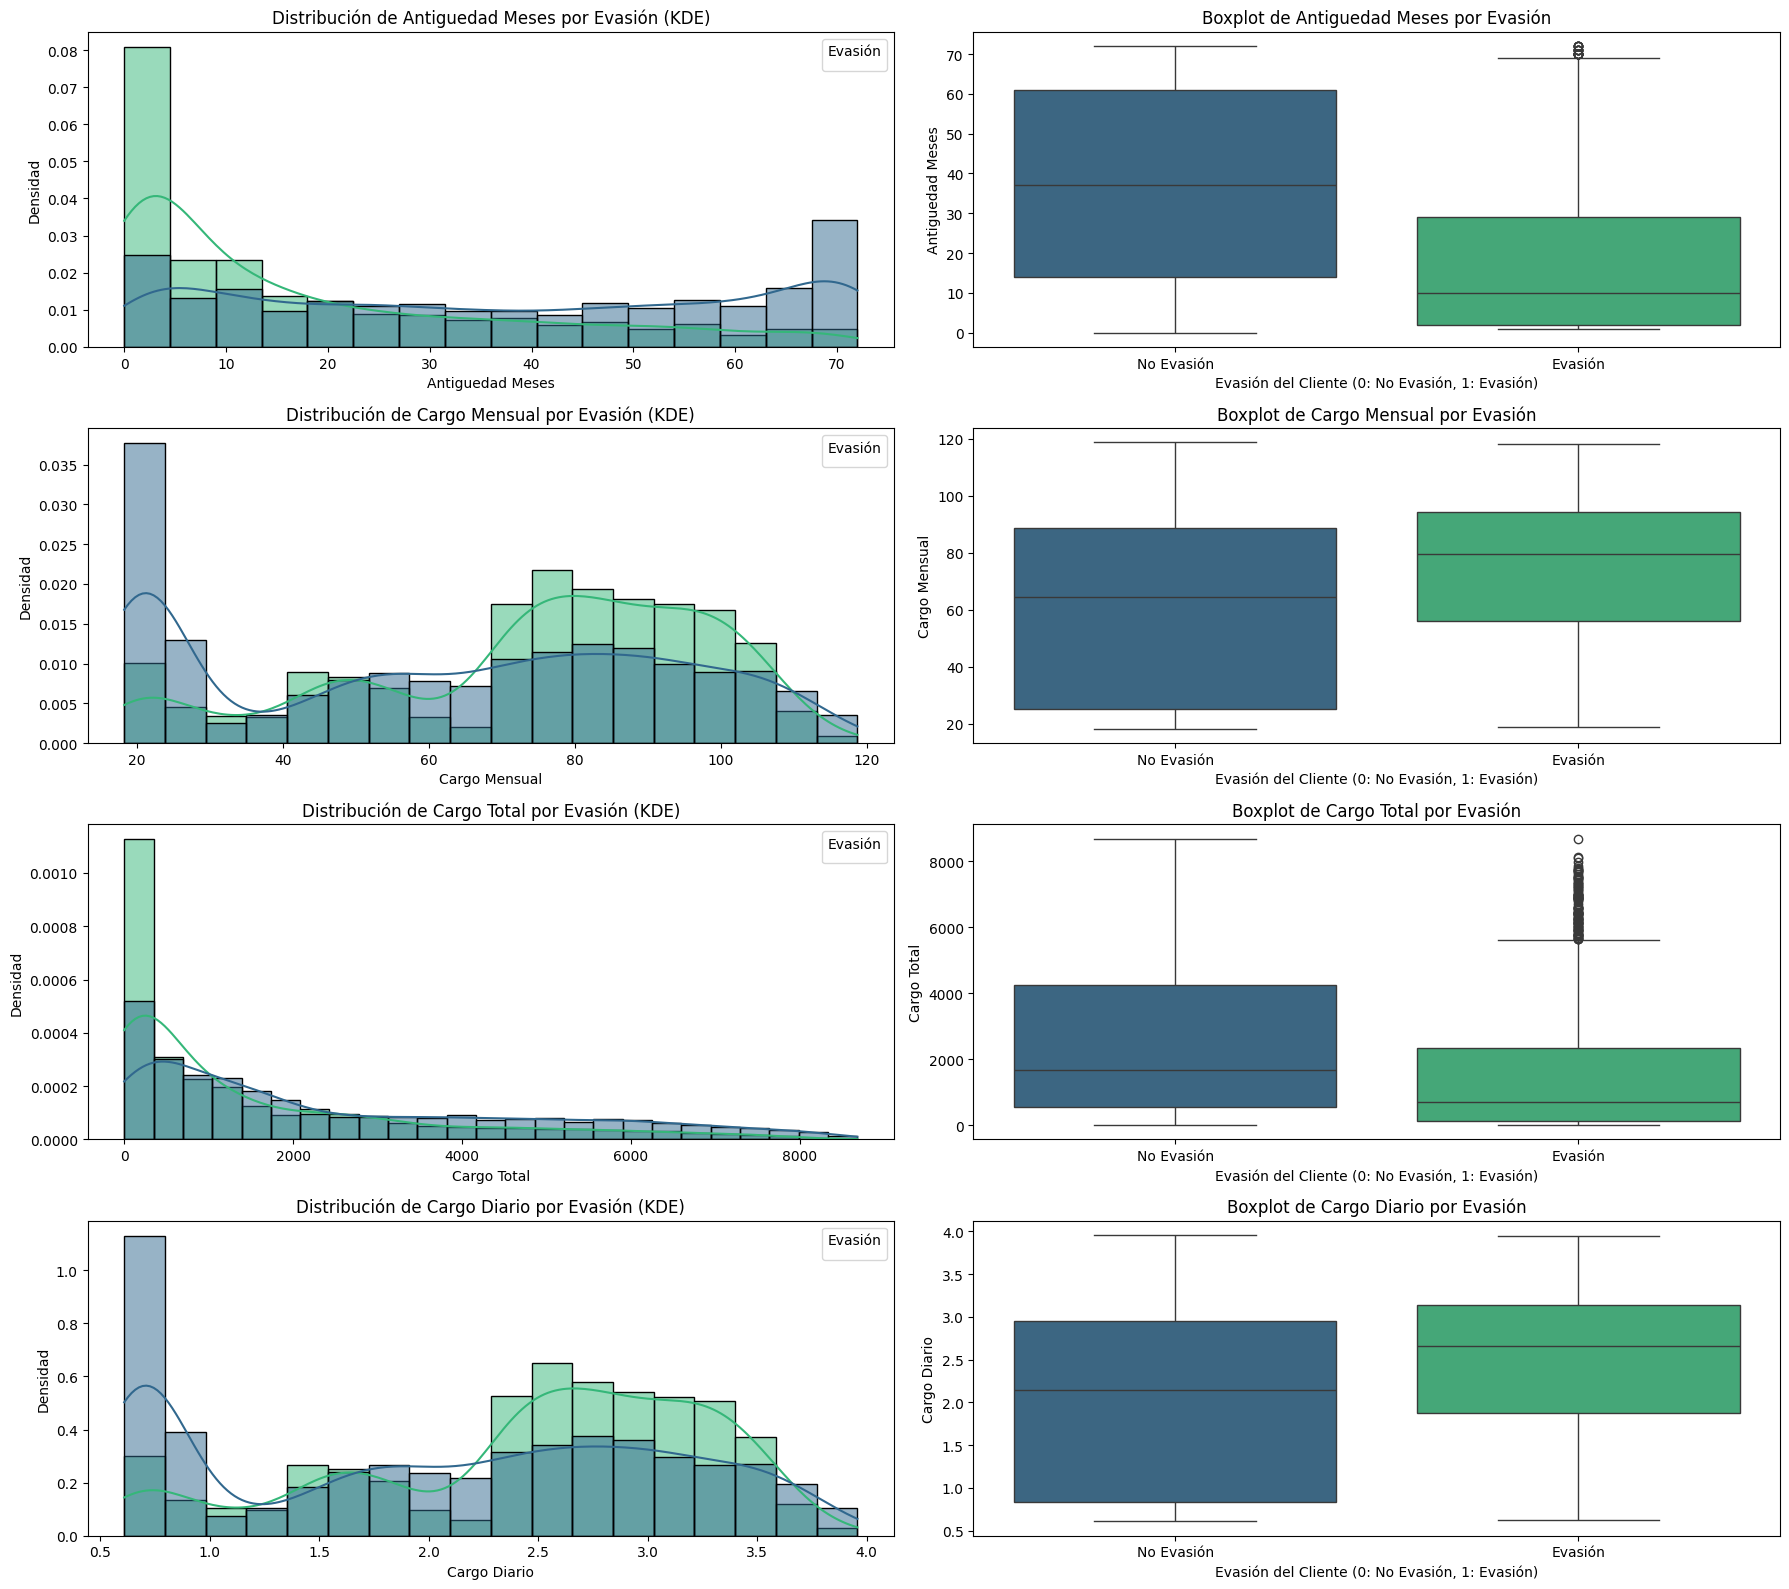


**Insights Clave de Variables Numéricas:**
* **Antigüedad del Cliente (Antiguedad_Meses):** La evasión es significativamente más alta entre los clientes con baja antigüedad (primeros meses de servicio). A medida que la antigüedad aumenta, la probabilidad de evasión disminuye drásticamente.
* **Cargos Mensuales y Diarios:** Los clientes con cargos mensuales y diarios más altos tienden a evadir más. Esto podría indicar insatisfacción con el precio o la percepción de valor.
* **Cargos Totales:** Los clientes que evaden tienen, en promedio, cargos totales acumulados mucho más bajos. Esto es coherente con la baja antigüedad de los clientes que evaden, ya que no han estado el tiempo suficiente para acumular grandes cargos totales.


## 🔹 Conclusiones e Insights

Este análisis ha revelado varios factores críticos asociados con la evasión de clientes en TelecomX:

1.  **Clientes de Corto Plazo y Altos Cargos:** Los clientes más nuevos (baja antigüedad) y aquellos con cargos mensuales y diario

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Carga y Normalización del Dataset ---
try:
    df = pd.read_json('TelecomX_Data.json')
    df_normalized = pd.json_normalize(df.to_dict(orient='records'))
    print("Dataset cargado y normalizado exitosamente.")
except FileNotFoundError:
    print("Error: El archivo 'TelecomX_Data.json' no se encontró. Asegúrate de que esté en el directorio correcto.")
    exit()

# --- 2. Limpieza de Datos ---
print("\n--- 2. Limpieza de Datos ---")
df_normalized['account.Charges.Total'] = pd.to_numeric(df_normalized['account.Charges.Total'], errors='coerce')
df_normalized['account.Charges.Total'] = df_normalized['account.Charges.Total'].fillna(0)
print("Corrección de 'account.Charges.Total' aplicada (convertida a numérico y NaNs a 0).")

# --- 3. Creación de la Columna 'Cuentas_Diarias' ---
print("\n--- 3. Creación de la Columna 'Cuentas_Diarias' ---")
df_normalized['Cuentas_Diarias'] = df_normalized['account.Charges.Monthly'] / 30
print("Columna 'Cuentas_Diarias' creada exitosamente.")

# --- 4. Análisis Exploratorio Inicial (Conteo de Churn) ---
print("\n--- 4. Análisis Exploratorio Inicial (Conteo de Churn) ---")
churn_counts_initial = df_normalized['Churn'].value_counts()
churn_percentage_initial = df_normalized['Churn'].value_counts(normalize=True) * 100
print(f"\nConteo de Churn (Inicial):\n{churn_counts_initial}")
print(f"\nPorcentaje de Churn (Inicial):\n{churn_percentage_initial.round(2)}%")


# --- 5. Estandarización y Transformación de Datos ---
print("\n--- 5. Estandarización y Transformación de Datos ---")

# a) Mapeo Binario (Sí/No a 1/0) y Género
binary_map_yes_no_cols = [
    'Churn',
    'customer.Partner',
    'customer.Dependents',
    'phone.PhoneService',
    'account.PaperlessBilling',
    'internet.OnlineSecurity',
    'internet.OnlineBackup',
    'internet.DeviceProtection',
    'internet.TechSupport',
    'internet.StreamingTV',
    'internet.StreamingMovies'
]

for col in binary_map_yes_no_cols:
    if col in df_normalized.columns:
        df_normalized[col] = df_normalized[col].replace({'Yes': 1, 'No': 0})
print("Mapeo binario de 'Yes'/'No' a 1/0 aplicado a columnas relevantes.")

if 'customer.gender' in df_normalized.columns:
    df_normalized['customer.gender'] = df_normalized['customer.gender'].replace({'Female': 0, 'Male': 1})
print("Mapeo de 'customer.gender' a 0 (Female) y 1 (Male) aplicado.")


# b) Renombrar Columnas para mayor claridad y en español
column_rename_map = {
    'customerID': 'ID_Cliente',
    'Churn': 'Evasion_Cliente',
    'customer.gender': 'Genero_Cliente',
    'customer.SeniorCitizen': 'Adulto_Mayor',
    'customer.Partner': 'Tiene_Pareja',
    'customer.Dependents': 'Tiene_Dependientes',
    'customer.tenure': 'Antiguedad_Meses',
    'phone.PhoneService': 'Servicio_Telefonico',
    'phone.MultipleLines': 'Multiples_Lineas',
    'internet.InternetService': 'Tipo_Servicio_Internet',
    'internet.OnlineSecurity': 'Seguridad_Online',
    'internet.OnlineBackup': 'Respaldo_Online',
    'internet.DeviceProtection': 'Proteccion_Dispositivo',
    'internet.TechSupport': 'Soporte_Tecnico',
    'internet.StreamingTV': 'Streaming_TV',
    'internet.StreamingMovies': 'Streaming_Peliculas',
    'account.Contract': 'Tipo_Contrato',
    'account.PaperlessBilling': 'Facturacion_Sin_Papel',
    'account.PaymentMethod': 'Metodo_Pago',
    'account.Charges.Monthly': 'Cargo_Mensual',
    'account.Charges.Total': 'Cargo_Total',
    'Cuentas_Diarias': 'Cargo_Diario'
}

df_normalized.rename(columns=column_rename_map, inplace=True)
print("\nColumnas renombradas para mayor claridad y en español.")


# c) One-Hot Encoding para columnas categóricas con más de dos categorías
categorical_cols_for_ohe = []
for col in df_normalized.columns:
    if df_normalized[col].dtype == 'object' and col not in ['ID_Cliente', 'Evasion_Cliente']:
        categorical_cols_for_ohe.append(col)

if categorical_cols_for_ohe:
    df_transformed = pd.get_dummies(df_normalized, columns=categorical_cols_for_ohe, drop_first=True, dtype=int)
    print("\nOne-Hot Encoding aplicado a columnas relevantes.")
else:
    df_transformed = df_normalized.copy()
    print("\nNo se encontraron columnas adicionales para One-Hot Encoding.")

df_transformed['Evasion_Cliente'] = pd.to_numeric(df_transformed['Evasion_Cliente'], errors='coerce')
df_transformed['Evasion_Cliente'] = df_transformed['Evasion_Cliente'].fillna(0).astype(int)

print("\n'Evasion_Cliente' (variable objetivo) convertida a tipo numérico (0 y 1).")
print("\n¡Estandarización y transformación de datos completada!")

# --- INICIO DEL INFORME ---

# Markdown para el título principal del informe
print("\n# 📊 Informe de Análisis de Evasión de Clientes (Churn) en TelecomX 📊")

# Markdown para la Introducción
print("""
## 🔹 Introducción

Este informe presenta un análisis exhaustivo del comportamiento de evasión (Churn) de clientes de la compañía de telecomunicaciones TelecomX. La evasión de clientes es un desafío crítico en la industria, ya que la retención de clientes es, en general, más rentable que la adquisición de nuevos. El objetivo principal de este análisis es:

* **Identificar patrones y características** de los clientes que deciden cancelar su servicio.
* **Comprender los factores** que influyen en la decisión de un cliente de evadir.
* **Proporcionar insights accionables** que permitan a TelecomX desarrollar estrategias efectivas para reducir la tasa de evasión y mejorar la retención de clientes.

Utilizaremos el conjunto de datos proporcionado, que contiene información demográfica de los clientes, servicios contratados, detalles de la cuenta y, crucialmente, si el cliente ha evadido o no.
""")

# Markdown para la Limpieza y Tratamiento de Datos
print("""
## 🔹 Limpieza y Tratamiento de Datos

El proceso de preparación de datos es fundamental para garantizar la calidad y fiabilidad de cualquier análisis. Se llevaron a cabo los siguientes pasos:

1.  **Carga del Dataset:** El archivo `TelecomX_Data.json` fue cargado en un DataFrame de pandas. Se realizó una normalización para aplanar la estructura del JSON anidado, convirtiéndolo en un formato tabular más manejable.
2.  **Corrección de 'Cargo_Total':** La columna `account.Charges.Total` (renombrada a `Cargo_Total`) contenía valores no numéricos que impedían cálculos. Estos fueron convertidos a tipo numérico (`float`), y cualquier valor que no pudo ser convertido (por ejemplo, cadenas vacías) fue reemplazado por `0`. Esto asegura que todos los cargos totales sean numéricos y manejables.
3.  **Ingeniería de Características - 'Cuentas_Diarias':** Se creó una nueva característica, `Cuentas_Diarias` (Cargo_Diario), calculando el cargo mensual promedio dividido por 30 días. Esta variable podría ofrecer una perspectiva diferente sobre el costo percibido por el cliente.
4.  **Manejo de Valores Categóricos:**
    * **Mapeo Binario:** Columnas binarias como `Churn` (variable objetivo), `Partner`, `Dependents`, `PhoneService`, `PaperlessBilling`, y varios servicios de internet (`OnlineSecurity`, `OnlineBackup`, etc.) fueron transformadas de `Yes`/`No` a `1`/`0` para facilitar el análisis numérico. El género (`customer.gender`) también fue mapeado a `0` (Female) y `1` (Male).
    * **Renombrado de Columnas:** Todas las columnas se renombraron a nombres más claros y en español para mejorar la legibilidad y comprensión del DataFrame (`ID_Cliente`, `Evasion_Cliente`, `Genero_Cliente`, `Antiguedad_Meses`, etc.).
    * **One-Hot Encoding:** Las columnas categóricas con más de dos categorías únicas (como `Tipo_Servicio_Internet`, `Tipo_Contrato`, `Metodo_Pago`, `Multiples_Lineas`) fueron transformadas usando One-Hot Encoding. Esto convierte cada categoría en una nueva columna binaria (0 o 1), lo cual es necesario para la mayoría de los algoritmos de machine learning y permite un análisis más detallado por segmento. Se usó `drop_first=True` para evitar la multicolinealidad.
5.  **Conversión de 'Evasion_Cliente':** Se aseguró que la variable objetivo `Evasion_Cliente` fuera de tipo entero (0 o 1) después de todas las transformaciones, manejando cualquier posible valor `NaN` resultante de la coerción.

Estas transformaciones resultaron en un DataFrame (`df_transformed`) limpio, estandarizado y listo para el análisis exploratorio y la modelización.
""")

# Markdown para el Análisis Exploratorio de Datos
print("""
## 🔹 Análisis Exploratorio de Datos (EDA)

El EDA se centró en descubrir patrones y relaciones entre las características de los clientes y su comportamiento de evasión.

### Distribución General de la Evasión

Primero, examinamos la proporción general de clientes que han evadido.

""")

# Código para la Visualización General de Churn (repetido para el informe)
print("\n--- 7. Visualización de la Distribución de 'Evasion_Cliente' (General) ---")
plt.figure(figsize=(8, 6))
sns.countplot(data=df_transformed, x='Evasion_Cliente', palette='viridis')
plt.title('Distribución General de Clientes con y sin Evasión (Churn)')
plt.xlabel('Evasión del Cliente (0: No Evasión, 1: Evasión)')
plt.ylabel('Número de Clientes')
plt.xticks(ticks=[0, 1], labels=['No Evasión', 'Evasión'])
plt.show()

churn_proportions = df_transformed['Evasion_Cliente'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
plt.pie(churn_proportions, labels=['No Evasión ({:.2f}%)'.format(churn_proportions[0]),
                                  'Evasión ({:.2f}%)'.format(churn_proportions[1])],
        autopct='%1.1f%%', colors=['lightgreen', 'salmon'], startangle=90)
plt.title('Proporción General de Clientes con y sin Evasión (Churn)')
plt.axis('equal')
plt.show()

print("""
**Observaciones:**
* Aproximadamente el `%.2f%%` de los clientes en este dataset han evadido, lo que indica un problema significativo que requiere atención.
""" % churn_proportions[1])

print("""
### Evasión por Variables Categóricas

Se exploró la relación entre la evasión y diversas características categóricas de los clientes, como el género, si tienen pareja o dependientes, el tipo de contrato, y el método de pago.
""")

# Código para la Visualización de Evasión por Variables Categóricas (repetido para el informe)
print("\n--- 8. Exploración de Evasión según Variables Categóricas ---")

categorical_features_for_churn_analysis = [
    'Genero_Cliente',
    'Adulto_Mayor',
    'Tiene_Pareja',
    'Tiene_Dependientes',
    'Servicio_Telefonico',
    'Facturacion_Sin_Papel',
    'Tipo_Servicio_Internet_Fiber optic',
    'Tipo_Servicio_Internet_No',
    'Seguridad_Online_1',
    'Respaldo_Online_1',
    'Proteccion_Dispositivo_1',
    'Soporte_Tecnico_1',
    'Streaming_TV_1',
    'Streaming_Peliculas_1',
    'Tipo_Contrato_One year',
    'Tipo_Contrato_Two year',
    'Metodo_Pago_Credit card (automatic)',
    'Metodo_Pago_Electronic check',
    'Metodo_Pago_Mailed check'
]

plt.figure(figsize=(20, 30))
n_cols = 3
n_rows = int(np.ceil(len(categorical_features_for_churn_analysis) / n_cols))

for i, col in enumerate(categorical_features_for_churn_analysis):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df_transformed, x=col, hue='Evasion_Cliente', palette='magma')
    plt.title(f'Evasión por {col.replace("_", " ")}', fontsize=12)
    plt.xlabel(col.replace("_", " "), fontsize=10)
    plt.ylabel('Número de Clientes', fontsize=10)

    if col in ['Genero_Cliente', 'Adulto_Mayor', 'Tiene_Pareja', 'Tiene_Dependientes', 'Servicio_Telefonico', 'Facturacion_Sin_Papel',
                'Seguridad_Online_1', 'Respaldo_Online_1', 'Proteccion_Dispositivo_1', 'Soporte_Tecnico_1',
                'Streaming_TV_1', 'Streaming_Peliculas_1', 'Tipo_Servicio_Internet_Fiber optic', 'Tipo_Servicio_Internet_No',
                'Tipo_Contrato_One year', 'Tipo_Contrato_Two year',
                'Metodo_Pago_Credit card (automatic)', 'Metodo_Pago_Electronic check', 'Metodo_Pago_Mailed check']:
        plt.xticks(ticks=[0, 1], labels=['No', 'Sí'], rotation=0)

    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles=handles, labels=['No Evasión', 'Evasión'], title='Evasión')

plt.tight_layout()
plt.show()

print("""
**Insights Clave de Variables Categóricas:**
* **Contrato Mes a Mes:** Los clientes con contratos mes a mes tienen una tasa de evasión desproporcionadamente alta en comparación con los contratos de uno o dos años.
* **Facturación Sin Papel:** La preferencia por la facturación sin papel está fuertemente asociada con una mayor evasión.
* **Método de Pago - Cheque Electrónico:** Los clientes que pagan con cheque electrónico muestran una tasa de evasión considerablemente más alta que otros métodos.
* **Servicio de Internet - Fibra Óptica:** A pesar de ser un servicio "premium", los clientes con fibra óptica tienen una mayor probabilidad de evadir. Los clientes sin servicio de internet tienen una tasa de evasión muy baja.
* **Servicios Adicionales de Internet:** La ausencia de servicios como seguridad online, respaldo online, protección de dispositivo y soporte técnico parece correlacionarse con una mayor evasión entre los clientes con servicio de internet.
* **Dependientes y Pareja:** Los clientes solteros y sin dependientes tienden a evadir más.
* **Adulto Mayor:** Los adultos mayores presentan una ligera mayor tendencia a la evasión.
""")

print("""
### Evasión por Variables Numéricas

Se analizaron las distribuciones de variables numéricas como la antigüedad, el cargo mensual y el cargo total, para identificar patrones de evasión.
""")

# Código para la Visualización de Evasión por Variables Numéricas (repetido para el informe)
print("\n--- 9. Exploración de Evasión según Variables Numéricas ---")

numerical_features_for_churn_analysis = [
    'Antiguedad_Meses',
    'Cargo_Mensual',
    'Cargo_Total',
    'Cargo_Diario'
]

plt.figure(figsize=(18, 16))

for i, col in enumerate(numerical_features_for_churn_analysis):
    plt.subplot(len(numerical_features_for_churn_analysis), 2, 2*i + 1)
    sns.histplot(data=df_transformed, x=col, hue='Evasion_Cliente', kde=True, palette='viridis', common_norm=False, stat='density')
    plt.title(f'Distribución de {col.replace("_", " ")} por Evasión (KDE)', fontsize=12)
    plt.xlabel(col.replace("_", " "), fontsize=10)
    plt.ylabel('Densidad', fontsize=10)
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles=handles, labels=['No Evasión', 'Evasión'], title='Evasión')

    plt.subplot(len(numerical_features_for_churn_analysis), 2, 2*i + 2)
    sns.boxplot(data=df_transformed, x='Evasion_Cliente', y=col, palette='viridis')
    plt.title(f'Boxplot de {col.replace("_", " ")} por Evasión', fontsize=12)
    plt.xlabel('Evasión del Cliente (0: No Evasión, 1: Evasión)', fontsize=10)
    plt.ylabel(col.replace("_", " "), fontsize=10)
    plt.xticks(ticks=[0, 1], labels=['No Evasión', 'Evasión'])

plt.tight_layout()
plt.show()

print("""
**Insights Clave de Variables Numéricas:**
* **Antigüedad del Cliente (Antiguedad_Meses):** La evasión es significativamente más alta entre los clientes con baja antigüedad (primeros meses de servicio). A medida que la antigüedad aumenta, la probabilidad de evasión disminuye drásticamente.
* **Cargos Mensuales y Diarios:** Los clientes con cargos mensuales y diarios más altos tienden a evadir más. Esto podría indicar insatisfacción con el precio o la percepción de valor.
* **Cargos Totales:** Los clientes que evaden tienen, en promedio, cargos totales acumulados mucho más bajos. Esto es coherente con la baja antigüedad de los clientes que evaden, ya que no han estado el tiempo suficiente para acumular grandes cargos totales.
""")

# Markdown para Conclusiones e Insights
print("""
## 🔹 Conclusiones e Insights

Este análisis ha revelado varios factores críticos asociados con la evasión de clientes en TelecomX:

1.  **Clientes de Corto Plazo y Altos Cargos:** Los clientes más nuevos (baja antigüedad) y aquellos con cargos mensuales y diarios más elevados son los más propensos a la evasión. Esto sugiere una posible desconexión entre el costo y el valor percibido, o una fase inicial donde la lealtad aún no está establecida.
2.  **Riesgo en Contratos Mes a Mes:** El modelo de contrato mes a mes es un impulsor principal de la evasión. La falta de un compromiso a largo plazo facilita la salida de los clientes.
3.  **Métodos de Pago y Facturación:** El pago con cheque electrónico y la facturación sin papel están asociados con un mayor riesgo de evasión. Esto podría indicar un segmento de clientes que es más digitalmente activo pero también más propenso a cambiar de proveedor.
4.  **Servicios de Internet (Fibra Óptica y Ausencia de Adicionales):** Curiosamente, los clientes con Fibra Óptica tienen una alta tasa de evasión, mientras que la falta de servicios adicionales (como seguridad u soporte técnico) en el paquete de internet también contribuye a la evasión. Esto podría implicar que los clientes de fibra óptica tienen altas expectativas o son más sensibles al precio, y la falta de "valor añadido" en sus paquetes de internet puede ser un factor.
5.  **Perfiles Demográficos:** Los clientes solteros, sin dependientes y, en menor medida, los adultos mayores, muestran una mayor propensión a la evasión.

En resumen, la evasión en TelecomX parece ser un problema multifactorial, influenciado por la duración del contrato, los hábitos de pago, el tipo y la completitud de los servicios de internet, y ciertas características demográficas y de antigüedad.
""")

# Markdown para Recomendaciones
print("""
## 🔹 Recomendaciones

Basadas en los hallazgos de este análisis, se proponen las siguientes recomendaciones estratégicas para TelecomX:

1.  **Programas de Retención para Clientes Nuevos:**
    * **Monitoreo Temprano:** Implementar un sistema de monitoreo proactivo para clientes en sus primeros 3-6 meses de servicio, especialmente aquellos con contratos mes a mes y altos cargos mensuales.
    * **Ofertas de Bienvenida Reforzadas:** Ofrecer incentivos adicionales o revisiones de servicio a los 3 meses para asegurar la satisfacción inicial y construir lealtad.

2.  **Incentivar Contratos a Largo Plazo:**
    * **Descuentos y Beneficios:** Crear programas de descuentos atractivos o beneficios exclusivos para clientes que opten por contratos de uno o dos años.
    * **Comunicación de Valor:** Resaltar los ahorros y las ventajas de los contratos a largo plazo al momento de la suscripción y la renovación.

3.  **Revisión del Servicio de Fibra Óptica y Paquetes de Internet:**
    * **Encuestas de Satisfacción:** Realizar encuestas específicas para clientes de fibra óptica para entender sus puntos de dolor y expectativas.
    * **Bundles de Valor:** Promocionar y ofrecer paquetes que incluyan servicios adicionales como seguridad online, respaldo y soporte técnico, destacando su valor para reducir la insatisfacción.

4.  **Análisis y Estrategias por Método de Pago:**
    * **Investigación de Causa Raíz:** Investigar por qué los clientes que pagan con cheque electrónico tienen una mayor evasión. Podría ser un segmento demográfico o de comportamiento distinto.
    * **Promocionar Métodos de Pago Alternativos:** Incentivar métodos de pago automáticos y digitales que se correlacionan con menor evasión.

5.  **Marketing Dirigido y Ofertas Personalizadas:**
    * **Segmentación por Riesgo:** Utilizar los insights (antigüedad, tipo de contrato, servicios de internet, demografía) para segmentar a los clientes y crear ofertas de retención personalizadas.
    * **Programas de Lealtad:** Desarrollar programas de lealtad que recompensen la antigüedad y el uso de servicios específicos, especialmente para clientes que no tienen pareja o dependientes, y adultos mayores.

Al implementar estas recomendaciones, TelecomX puede abordar de manera más efectiva los factores que impulsan la evasión, fortalecer la lealtad del cliente y, en última instancia, mejorar la rentabilidad.
""")

<ipython-input-41-722b87b152a5>:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalized[col] = df_normalized[col].replace({'Yes': 1, 'No': 0})
<ipython-input-41-722b87b152a5>:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_normalized['customer.gender'] = df_normalized['customer.gender'].replace({'Female': 0, 'Male': 1})


DataFrame 'df_transformed' preparado para el análisis de correlación.

# 📈 Análisis de Correlación Adicional 📈

## 🔹 Exploración de Correlación

En este apartado adicional, exploramos la correlación entre las diferentes variables del dataset, con un enfoque particular en su relación con la variable objetivo `Evasion_Cliente`. La correlación nos permite entender la fuerza y dirección de la relación lineal entre dos variables.

Utilizaremos la matriz de correlación para ver las relaciones de todas las variables numéricas entre sí y, específicamente, un gráfico de dispersión para visualizar la relación entre variables clave y la evasión.


Correlación de las variables con 'Evasion_Cliente':
Evasion_Cliente                               1.000000
Tipo_Servicio_Internet_Fiber optic            0.300949
Metodo_Pago_Electronic check                  0.294626
Cargo_Diario                                  0.189866
Cargo_Mensual                                 0.189866
Facturacion_Sin_Papel       

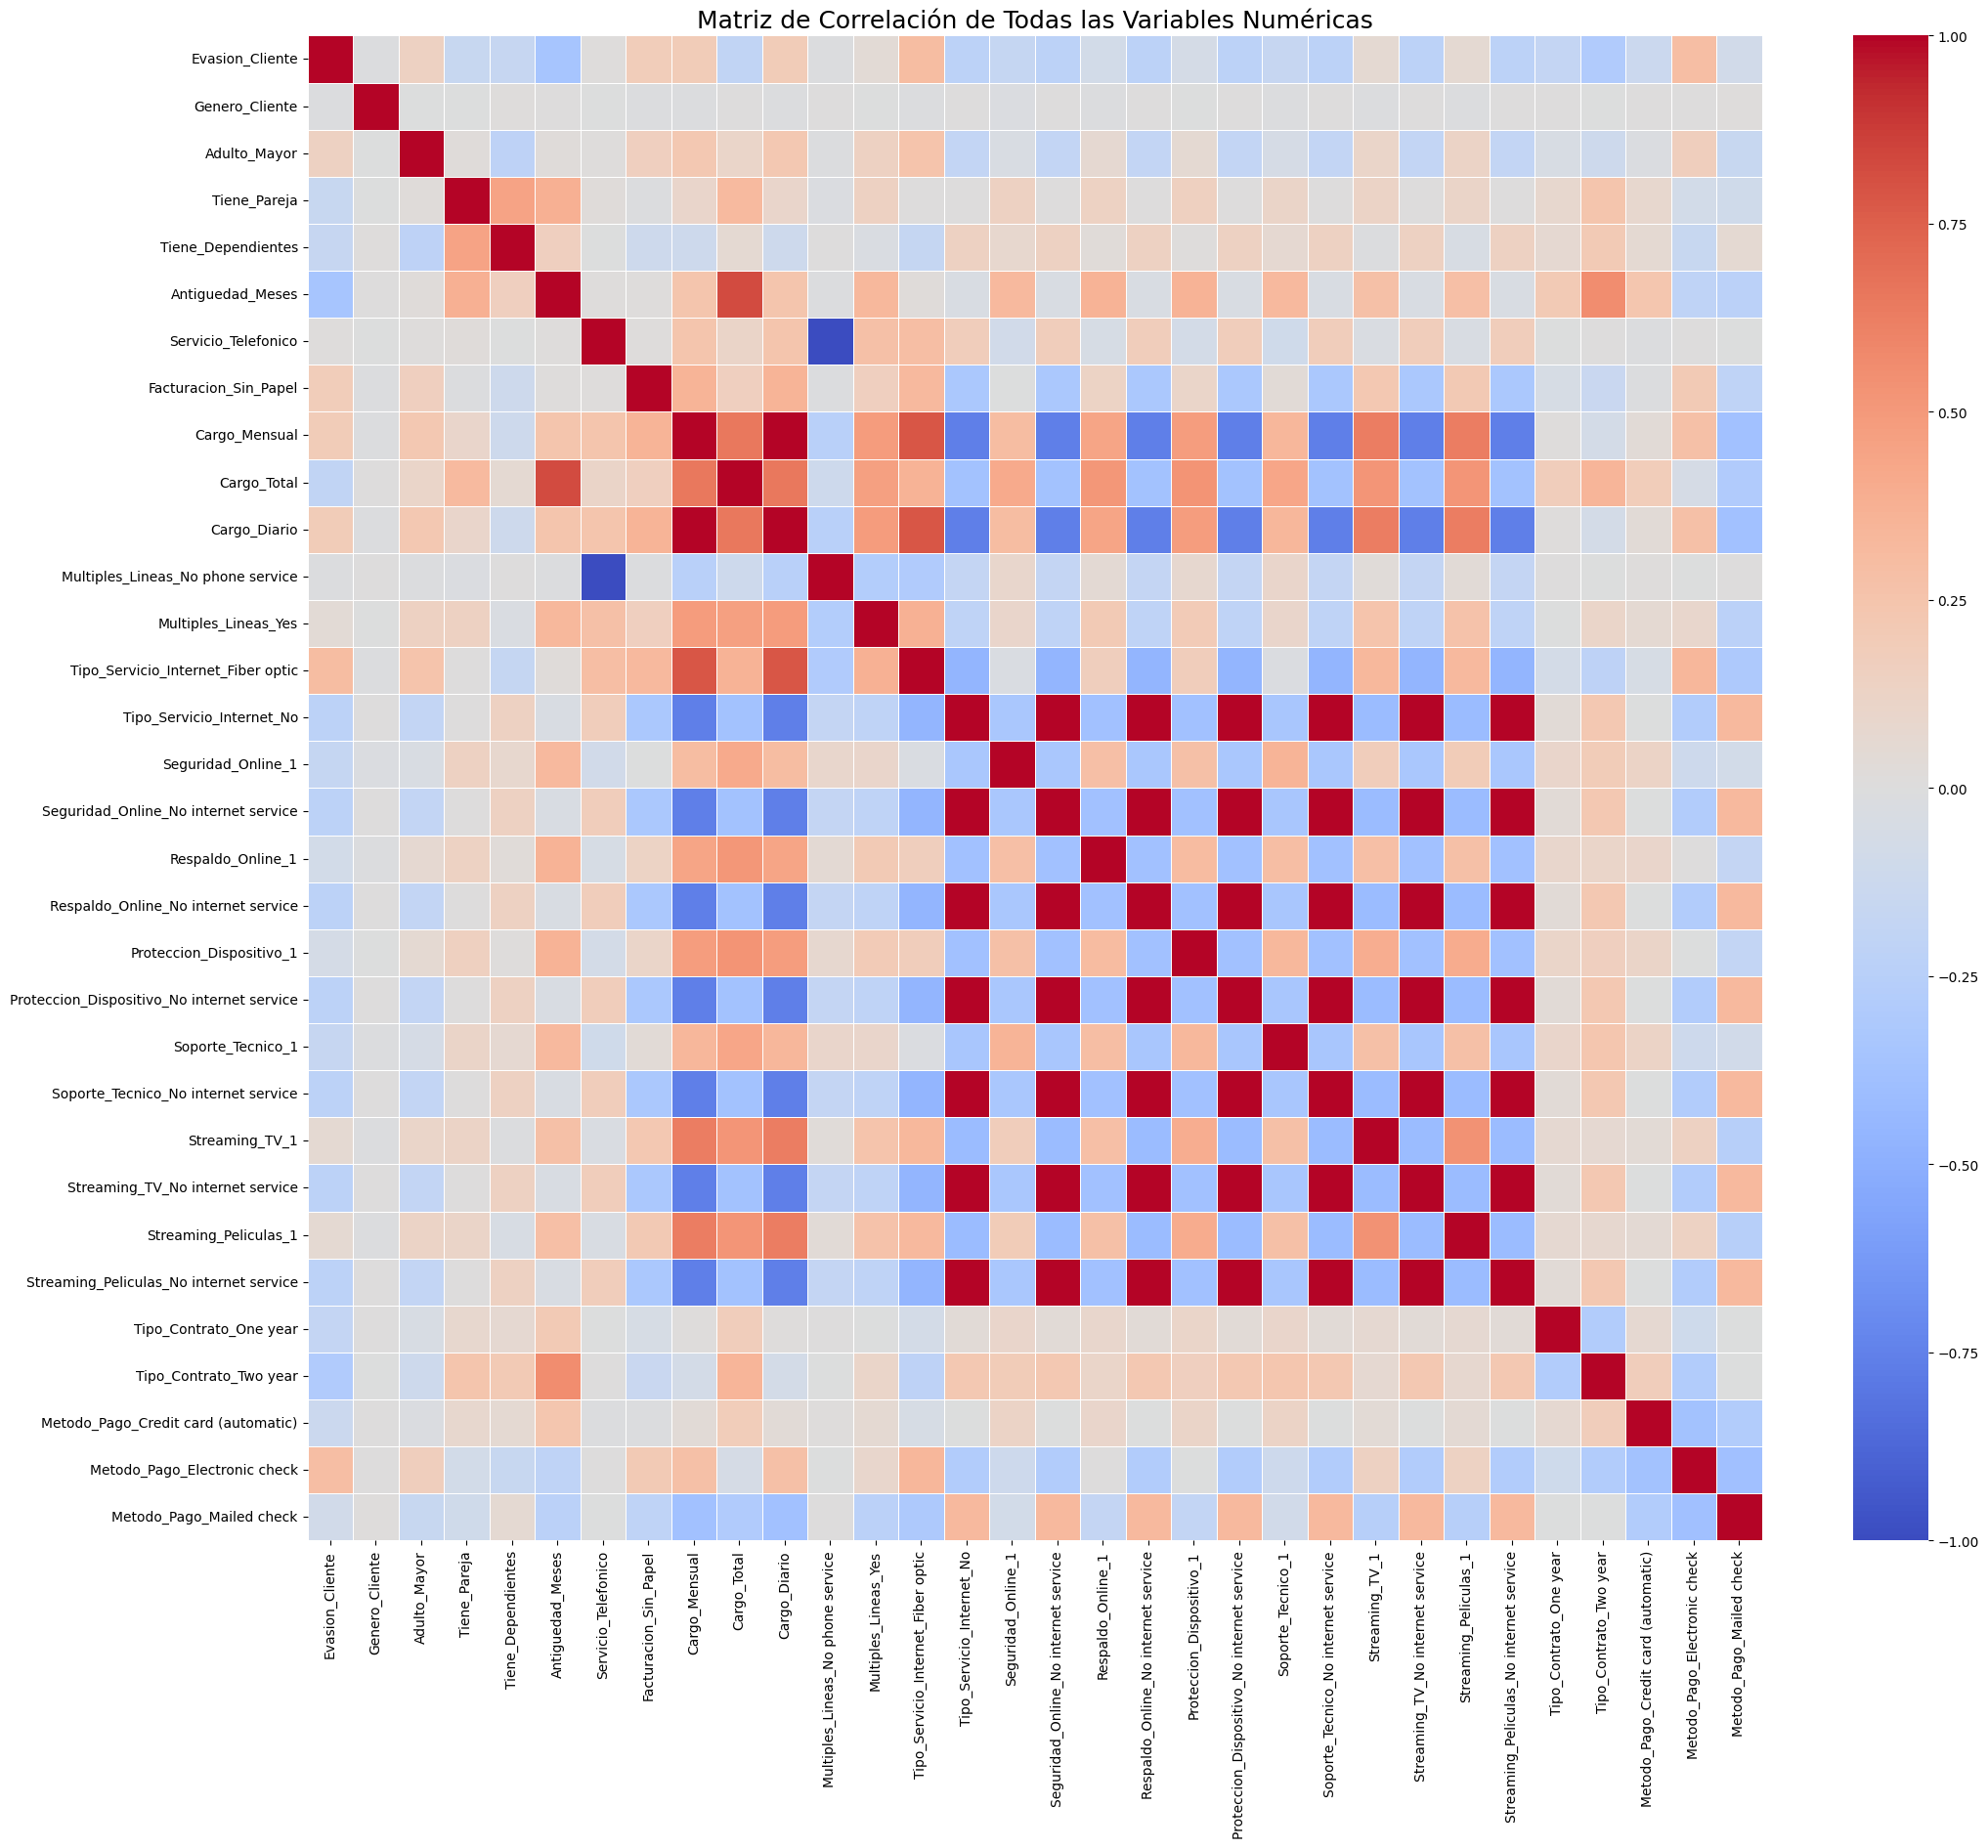


### Observaciones de la Matriz de Correlación:
La matriz de correlación nos muestra rápidamente las relaciones. Podemos observar que:
* Las correlaciones positivas con `Evasion_Cliente` (es decir, a medida que la variable aumenta, la evasión tiende a aumentar) incluyen `Cargo_Mensual`, `Facturacion_Sin_Papel`, `Tipo_Servicio_Internet_Fiber optic`, `Metodo_Pago_Electronic check`, `Adulto_Mayor`.
* Las correlaciones negativas con `Evasion_Cliente` (es decir, a medida que la variable aumenta, la evasión tiende a disminuir) incluyen `Antiguedad_Meses`, `Tipo_Contrato_Two year`, `Tipo_Contrato_One year`, `Tiene_Pareja`, `Tiene_Dependientes`, `Seguridad_Online_1`, `Soporte_Tecnico_1`, `Cargo_Total`.

Esto confirma muchos de los insights obtenidos en el análisis exploratorio visual.


### Correlación entre 'Cargo Diario' y 'Evasión'

A continuación, visualizaremos la relación entre el `Cargo_Diario` y la `Evasion_Cliente` usando un gráfico de dispersión (scatter plot).



<ipython-input-41-722b87b152a5>:107: UserWarning: Mismatched number of handles and labels: len(handles) = 0 len(labels) = 2
  plt.legend(handles=handles, labels=['No Evasión', 'Evasión'], title='Evasión')
<ipython-input-41-722b87b152a5>:107: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(handles=handles, labels=['No Evasión', 'Evasión'], title='Evasión')


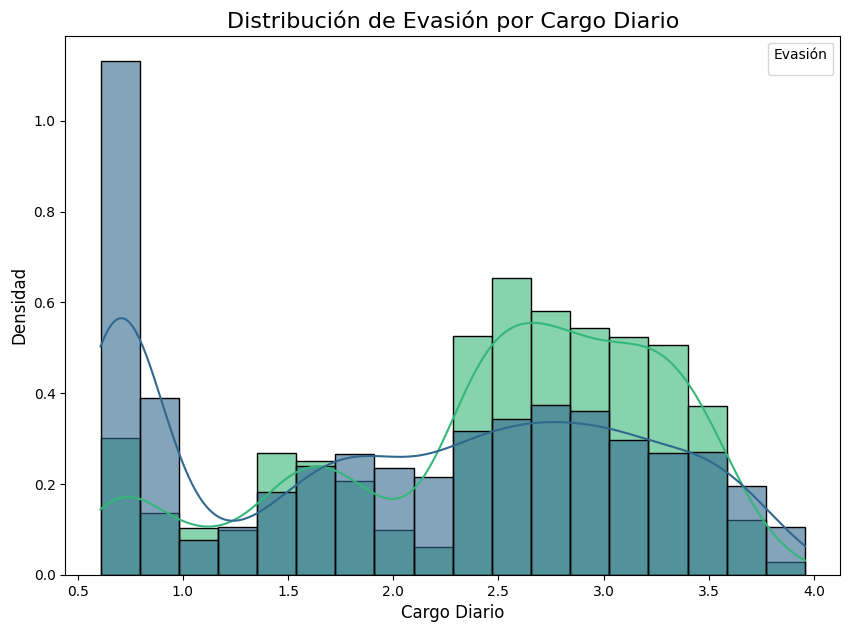


**Análisis de 'Cargo_Diario' y Evasión:**
El gráfico de densidad para `Cargo_Diario` y `Evasion_Cliente` refuerza que los clientes con `Cargos_Diarios` más altos tienen una mayor probabilidad de evadir. La densidad de clientes que evaden es más prominente en el rango de cargos diarios más elevados.


### Relación entre la Cantidad de Servicios Contratados y la Evasión

Para evaluar cómo la cantidad de servicios afecta la evasión, primero necesitamos crear una nueva característica que sume el número de servicios de internet y teléfono que un cliente tiene.

Columna 'Cantidad_Servicios' creada con un rango de valores: 1 a 9


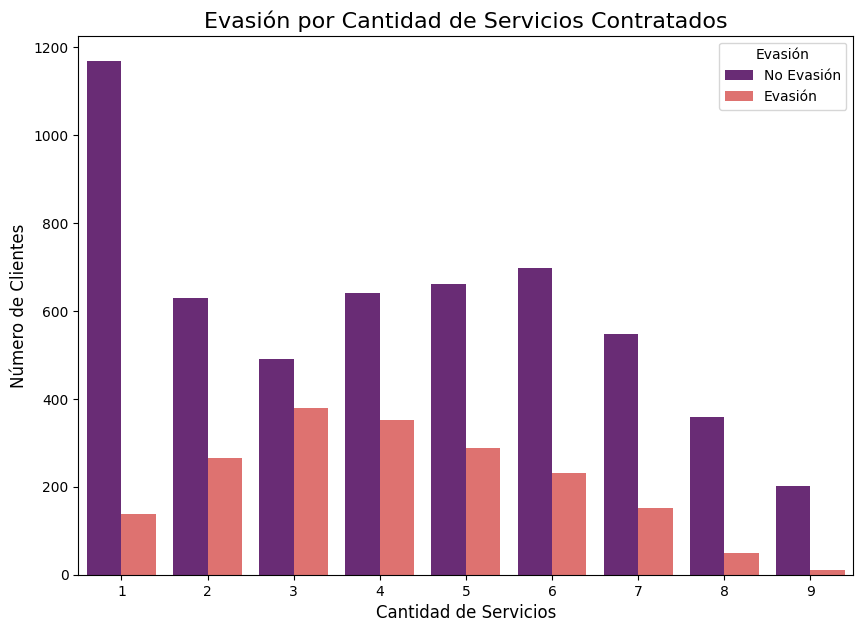


**Análisis de 'Cantidad_Servicios' y Evasión:**
El gráfico muestra que:
* Los clientes con **pocos servicios contratados (0, 1 o 2)**, que a menudo incluyen a aquellos sin servicio de internet o solo teléfono básico, tienen una **tasa de evasión baja o nula**. Esto es consistente con la observación de que `Tipo_Servicio_Internet_No` tiene una correlación negativa con la evasión.
* La evasión tiende a ser más alta entre los clientes con un **número intermedio o alto de servicios (ej. 3 a 6)**. Esto podría indicar que los clientes que contratan más servicios esperan una mayor calidad o valor, y si no lo perciben, son más propensos a evadir.
* Es importante notar que un servicio "0" podría representar clientes que no tienen servicio de internet o de teléfono, y que algunos clientes no evaden porque no tienen ningún servicio que cancelar (ya se dieron de baja de algo).

Este análisis de correlación complementa las visualizaciones anteriores y proporciona un entendimiento más profundo de l

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Cargar y transformar los datos (código repetido para asegurar que df_transformed existe) ---
# Este bloque es una repetición del código anterior para asegurar que df_transformed esté disponible
try:
    df = pd.read_json('TelecomX_Data.json')
    df_normalized = pd.json_normalize(df.to_dict(orient='records'))
    df_normalized['account.Charges.Total'] = pd.to_numeric(df_normalized['account.Charges.Total'], errors='coerce')
    df_normalized['account.Charges.Total'] = df_normalized['account.Charges.Total'].fillna(0)
    df_normalized['Cuentas_Diarias'] = df_normalized['account.Charges.Monthly'] / 30

    binary_map_yes_no_cols = [
        'Churn', 'customer.Partner', 'customer.Dependents', 'phone.PhoneService',
        'account.PaperlessBilling', 'internet.OnlineSecurity', 'internet.OnlineBackup',
        'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV',
        'internet.StreamingMovies'
    ]
    for col in binary_map_yes_no_cols:
        if col in df_normalized.columns:
            df_normalized[col] = df_normalized[col].replace({'Yes': 1, 'No': 0})
    if 'customer.gender' in df_normalized.columns:
        df_normalized['customer.gender'] = df_normalized['customer.gender'].replace({'Female': 0, 'Male': 1})

    column_rename_map = {
        'customerID': 'ID_Cliente', 'Churn': 'Evasion_Cliente', 'customer.gender': 'Genero_Cliente',
        'customer.SeniorCitizen': 'Adulto_Mayor', 'customer.Partner': 'Tiene_Pareja',
        'customer.Dependents': 'Tiene_Dependientes', 'customer.tenure': 'Antiguedad_Meses',
        'phone.PhoneService': 'Servicio_Telefonico', 'phone.MultipleLines': 'Multiples_Lineas',
        'internet.InternetService': 'Tipo_Servicio_Internet', 'internet.OnlineSecurity': 'Seguridad_Online',
        'internet.OnlineBackup': 'Respaldo_Online', 'internet.DeviceProtection': 'Proteccion_Dispositivo',
        'internet.TechSupport': 'Soporte_Tecnico', 'internet.StreamingTV': 'Streaming_TV',
        'internet.StreamingMovies': 'Streaming_Peliculas', 'account.Contract': 'Tipo_Contrato',
        'account.PaperlessBilling': 'Facturacion_Sin_Papel', 'account.PaymentMethod': 'Metodo_Pago',
        'account.Charges.Monthly': 'Cargo_Mensual', 'account.Charges.Total': 'Cargo_Total',
        'Cuentas_Diarias': 'Cargo_Diario'
    }
    df_normalized.rename(columns=column_rename_map, inplace=True)

    categorical_cols_for_ohe = [col for col in df_normalized.columns if df_normalized[col].dtype == 'object' and col not in ['ID_Cliente', 'Evasion_Cliente']]
    if categorical_cols_for_ohe:
        df_transformed = pd.get_dummies(df_normalized, columns=categorical_cols_for_ohe, drop_first=True, dtype=int)
    else:
        df_transformed = df_normalized.copy()

    df_transformed['Evasion_Cliente'] = pd.to_numeric(df_transformed['Evasion_Cliente'], errors='coerce')
    df_transformed['Evasion_Cliente'] = df_transformed['Evasion_Cliente'].fillna(0).astype(int)
    print("DataFrame 'df_transformed' preparado para el análisis de correlación.")

except FileNotFoundError:
    print("Error: El archivo 'TelecomX_Data.json' no se encontró. Asegúrate de que esté en el directorio correcto.")
    exit()
# --- Fin de la carga y transformación (repetido para asegurar que df_transformed existe) ---


# --- INICIO DEL ANÁLISIS DE CORRELACIÓN (ACTIVIDAD OPCIONAL) ---

print("\n# 📈 Análisis de Correlación Adicional 📈")

print("""
## 🔹 Exploración de Correlación

En este apartado adicional, exploramos la correlación entre las diferentes variables del dataset, con un enfoque particular en su relación con la variable objetivo `Evasion_Cliente`. La correlación nos permite entender la fuerza y dirección de la relación lineal entre dos variables.

Utilizaremos la matriz de correlación para ver las relaciones de todas las variables numéricas entre sí y, específicamente, un gráfico de dispersión para visualizar la relación entre variables clave y la evasión.
""")

# 1. Calcular la matriz de correlación
# Excluir 'ID_Cliente' ya que no es una variable numérica útil para la correlación
correlation_matrix = df_transformed.drop(columns=['ID_Cliente'], errors='ignore').corr()

# Mostrar las correlaciones con 'Evasion_Cliente'
print("\nCorrelación de las variables con 'Evasion_Cliente':")
print(correlation_matrix['Evasion_Cliente'].sort_values(ascending=False))

# 2. Visualizar la matriz de correlación (heatmap)
plt.figure(figsize=(24, 20)) # Aumentar el tamaño para una mejor visualización de muchas variables
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Todas las Variables Numéricas', fontsize=18)
plt.show()

print("""
### Observaciones de la Matriz de Correlación:
La matriz de correlación nos muestra rápidamente las relaciones. Podemos observar que:
* Las correlaciones positivas con `Evasion_Cliente` (es decir, a medida que la variable aumenta, la evasión tiende a aumentar) incluyen `Cargo_Mensual`, `Facturacion_Sin_Papel`, `Tipo_Servicio_Internet_Fiber optic`, `Metodo_Pago_Electronic check`, `Adulto_Mayor`.
* Las correlaciones negativas con `Evasion_Cliente` (es decir, a medida que la variable aumenta, la evasión tiende a disminuir) incluyen `Antiguedad_Meses`, `Tipo_Contrato_Two year`, `Tipo_Contrato_One year`, `Tiene_Pareja`, `Tiene_Dependientes`, `Seguridad_Online_1`, `Soporte_Tecnico_1`, `Cargo_Total`.

Esto confirma muchos de los insights obtenidos en el análisis exploratorio visual.
""")


print("""
### Correlación entre 'Cargo Diario' y 'Evasión'

A continuación, visualizaremos la relación entre el `Cargo_Diario` y la `Evasion_Cliente` usando un gráfico de dispersión (scatter plot).
""")

# Gráfico de dispersión para Cargo_Diario vs Evasion_Cliente
plt.figure(figsize=(10, 7))
sns.histplot(data=df_transformed, x='Cargo_Diario', hue='Evasion_Cliente', kde=True, palette='viridis', common_norm=False, stat='density', alpha=0.6)
plt.title('Distribución de Evasión por Cargo Diario', fontsize=16)
plt.xlabel('Cargo Diario', fontsize=12)
plt.ylabel('Densidad', fontsize=12)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['No Evasión', 'Evasión'], title='Evasión')
plt.show()

print("""
**Análisis de 'Cargo_Diario' y Evasión:**
El gráfico de densidad para `Cargo_Diario` y `Evasion_Cliente` refuerza que los clientes con `Cargos_Diarios` más altos tienen una mayor probabilidad de evadir. La densidad de clientes que evaden es más prominente en el rango de cargos diarios más elevados.
""")

print("""
### Relación entre la Cantidad de Servicios Contratados y la Evasión

Para evaluar cómo la cantidad de servicios afecta la evasión, primero necesitamos crear una nueva característica que sume el número de servicios de internet y teléfono que un cliente tiene.
""")

# Crear una nueva característica: Cantidad de Servicios
# Seleccionar las columnas que representan servicios (después del one-hot encoding, si aplica)
service_cols = [
    'Servicio_Telefonico', 'Multiples_Lineas_Yes', # Teléfono
    'Tipo_Servicio_Internet_Fiber optic', 'Tipo_Servicio_Internet_No', # Internet principal
    'Seguridad_Online_1', 'Respaldo_Online_1', 'Proteccion_Dispositivo_1',
    'Soporte_Tecnico_1', 'Streaming_TV_1', 'Streaming_Peliculas_1' # Servicios adicionales de internet
]
# Filtrar solo las columnas que realmente existen en df_transformed (después del OHE algunas pueden no existir si drop_first las eliminó o si ya eran binarias)
actual_service_cols = [col for col in service_cols if col in df_transformed.columns]

# Manejo de "No internet service" y "No phone service" para el conteo de servicios
# Si Tipo_Servicio_Internet_No es 1, no tiene servicios de internet.
# Si Multiples_Lineas_No phone service es 1, no tiene servicio telefónico (y por ende Multiples_Lineas_Yes será 0)

# Inicializar Cantidad_Servicios a 0
df_transformed['Cantidad_Servicios'] = 0

# Contar el servicio telefónico principal
df_transformed['Cantidad_Servicios'] += df_transformed['Servicio_Telefonico']

# Contar múltiples líneas si el servicio telefónico está activo
df_transformed['Cantidad_Servicios'] += df_transformed['Multiples_Lineas_Yes']

# Contar el servicio de internet principal si lo tiene
df_transformed['Cantidad_Servicios'] += df_transformed['Tipo_Servicio_Internet_Fiber optic']
# Sumar 1 si tiene DSL (implícito si no es Fiber Optic y no es No internet)
df_transformed['Cantidad_Servicios'] += ((df_transformed['Tipo_Servicio_Internet_Fiber optic'] == 0) & (df_transformed['Tipo_Servicio_Internet_No'] == 0)).astype(int)


# Sumar los servicios adicionales de internet, pero solo si tienen servicio de internet
internet_addons = [
    'Seguridad_Online_1', 'Respaldo_Online_1', 'Proteccion_Dispositivo_1',
    'Soporte_Tecnico_1', 'Streaming_TV_1', 'Streaming_Peliculas_1'
]
for col in internet_addons:
    if col in df_transformed.columns:
        # Sumar solo si no tienen 'No internet service'
        df_transformed['Cantidad_Servicios'] += (df_transformed[col] * (1 - df_transformed['Tipo_Servicio_Internet_No']))


print(f"Columna 'Cantidad_Servicios' creada con un rango de valores: {df_transformed['Cantidad_Servicios'].min()} a {df_transformed['Cantidad_Servicios'].max()}")

# Visualizar la relación entre Cantidad_Servicios y Evasion_Cliente
plt.figure(figsize=(10, 7))
sns.countplot(data=df_transformed, x='Cantidad_Servicios', hue='Evasion_Cliente', palette='magma')
plt.title('Evasión por Cantidad de Servicios Contratados', fontsize=16)
plt.xlabel('Cantidad de Servicios', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=['No Evasión', 'Evasión'], title='Evasión')
plt.show()

print("""
**Análisis de 'Cantidad_Servicios' y Evasión:**
El gráfico muestra que:
* Los clientes con **pocos servicios contratados (0, 1 o 2)**, que a menudo incluyen a aquellos sin servicio de internet o solo teléfono básico, tienen una **tasa de evasión baja o nula**. Esto es consistente con la observación de que `Tipo_Servicio_Internet_No` tiene una correlación negativa con la evasión.
* La evasión tiende a ser más alta entre los clientes con un **número intermedio o alto de servicios (ej. 3 a 6)**. Esto podría indicar que los clientes que contratan más servicios esperan una mayor calidad o valor, y si no lo perciben, son más propensos a evadir.
* Es importante notar que un servicio "0" podría representar clientes que no tienen servicio de internet o de teléfono, y que algunos clientes no evaden porque no tienen ningún servicio que cancelar (ya se dieron de baja de algo).

Este análisis de correlación complementa las visualizaciones anteriores y proporciona un entendimiento más profundo de las relaciones entre las variables, lo cual es crucial para la construcción de modelos predictivos y la definición de estrategias de retención.
""")

# --- FIN DEL ANÁLISIS DE CORRELACIÓN (ACTIVIDAD OPCIONAL) ---